In [492]:
#Author : Kafi
#Importing all the libraries and packages that we will be needing
#importing pandas, numpy, matplotlib ,statsmodel and sklearn 

from __future__ import division
from datetime import datetime, timedelta,date
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt   
import numpy as np

import itertools

#import Missingo 
import missingno as msno
import statsmodels.api as sm

import warnings
warnings.filterwarnings("ignore")

#import plotly
import plotly.plotly as py
import plotly.offline as pyoff
import plotly.graph_objs as go


from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

import statsmodels.graphics.tsaplots as sgt 
import statsmodels.tsa.stattools as sts 
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

#pdarima for autoarima 
from pmdarima.arima import auto_arima

from sklearn.model_selection import KFold, cross_val_score, train_test_split

pyoff.init_notebook_mode()



In [493]:
data_raw = pd.read_csv("Stainless-Steel-Prices-Forecasty-Assignment.csv")
data_raw.head()

Date  StainlessSteelPrice  Steel_Inventory_M_USD  Steel_Orders_M_USD  \
0   7/1/2013             0.827352                  20575               10568   
1   8/1/2013             0.760221                  20609               10821   
2   9/1/2013             0.784715                  20761               10774   
3  10/1/2013             0.769293                  20735               11291   
4  11/1/2013             0.750242                  20854               11559   

   IronOre_Global_USD  CoalAustralia_Global_USD  Energy_Index  \
0          127.191304                 82.222360    227.022942   
1          137.055000                 82.221429    232.234194   
2          134.185714                 83.295918    234.335594   
3          132.572727                 85.443634    229.393932   
4          136.323810                 88.363265    225.437049   

   Nickel_Global_USD  Zinc_Global_USD  Freight_Transport_Index  \
0        13750.31522      1837.619565                     -0.4   
1        14308.26190      1896.392857                      0.5   
2        13801.39286      1846.880952                      0.1   
3        14117.65217      1884.836957                     -0.1   
4        13684.01190      1866.416667                      2.1   

   WTI_Crude_Global_USD  Baltic_Dry_Index  BCI_China  BCI_Europe    BCI_US  \
0            104.545217              1062   98.80018    99.64265  100.1044   
1            106.546364              1132   99.04874    99.91766  100.3962   
2            106.313809              2003   99.27196   100.18490  100.5363   
3            100.500435              1504   99.40488   100.36330  100.5771   
4             93.812381              1821   99.36221   100.49830  100.5459   

   CLI_China  CLI_Europe    CLI_US  PMI_US_Manufacturing  Copper_Global_USD   
0   101.1423    99.43615  100.6230                  50.9             6906.64  
1   101.1938    99.64082  100.6545                  55.4             7186.25  
2   101.2066    99.84383  100.6646                  55.7             7159.27  
3   101.1835   100.02300  100.6666                  56.2             7203.02  
4   101.1283   100.17150  100.6744                  56.4             7070.65

In [494]:
data_steel = data_raw.copy() 


In [495]:
#Converting the Date column (String) into proper datetime format 

data_steel['Date'] = pd.to_datetime(data_steel['Date'])
data_steel.head()

Date  StainlessSteelPrice  Steel_Inventory_M_USD  Steel_Orders_M_USD  \
0 2013-07-01             0.827352                  20575               10568   
1 2013-08-01             0.760221                  20609               10821   
2 2013-09-01             0.784715                  20761               10774   
3 2013-10-01             0.769293                  20735               11291   
4 2013-11-01             0.750242                  20854               11559   

   IronOre_Global_USD  CoalAustralia_Global_USD  Energy_Index  \
0          127.191304                 82.222360    227.022942   
1          137.055000                 82.221429    232.234194   
2          134.185714                 83.295918    234.335594   
3          132.572727                 85.443634    229.393932   
4          136.323810                 88.363265    225.437049   

   Nickel_Global_USD  Zinc_Global_USD  Freight_Transport_Index  \
0        13750.31522      1837.619565                     -0.4   
1        14308.26190      1896.392857                      0.5   
2        13801.39286      1846.880952                      0.1   
3        14117.65217      1884.836957                     -0.1   
4        13684.01190      1866.416667                      2.1   

   WTI_Crude_Global_USD  Baltic_Dry_Index  BCI_China  BCI_Europe    BCI_US  \
0            104.545217              1062   98.80018    99.64265  100.1044   
1            106.546364              1132   99.04874    99.91766  100.3962   
2            106.313809              2003   99.27196   100.18490  100.5363   
3            100.500435              1504   99.40488   100.36330  100.5771   
4             93.812381              1821   99.36221   100.49830  100.5459   

   CLI_China  CLI_Europe    CLI_US  PMI_US_Manufacturing  Copper_Global_USD   
0   101.1423    99.43615  100.6230                  50.9             6906.64  
1   101.1938    99.64082  100.6545                  55.4             7186.25  
2   101.2066    99.84383  100.6646                  55.7             7159.27  
3   101.1835   100.02300  100.6666                  56.2             7203.02  
4   101.1283   100.17150  100.6744                  56.4             7070.65

# Data Exploration



We will be exploring the data a bit and create some graphs to visualize the data properly.

In [496]:
#Using describe method getting some stats from the whole dataset.

display(data_steel.describe())

StainlessSteelPrice  Steel_Inventory_M_USD  Steel_Orders_M_USD  \
count            84.000000              84.000000           84.000000   
mean              0.810715           20070.559524         9831.595238   
std               0.143444            1764.033210         1240.333905   
min               0.499859           16688.000000         7650.000000   
25%               0.743778           18980.000000         8904.000000   
50%               0.812157           20190.000000         9947.000000   
75%               0.893690           21458.500000        11062.500000   
max               1.075014           23464.000000        11825.000000   

       IronOre_Global_USD  CoalAustralia_Global_USD  Energy_Index  \
count           84.000000                 84.000000     84.000000   
mean            79.962940                 81.844151    143.408951   
std             23.874776                 19.443360     47.136073   
min             40.882609                 53.428929     52.771306   
25%             61.484190                 67.111352    111.607197   
50%             74.280682                 78.677679    131.088857   
75%             92.409524                 96.985695    163.923895   
max            137.055000                125.085877    237.208789   

       Nickel_Global_USD  Zinc_Global_USD  Freight_Transport_Index  \
count          84.000000        84.000000                84.000000   
mean        12712.275477      2358.786301                 0.122619   
std          2694.729168       470.463900                 1.230080   
min          8298.500000      1520.362500                -7.100000   
25%         10578.975000      2021.262099                -0.425000   
50%         12721.351135      2287.054725                 0.250000   
75%         14105.350543      2658.296875                 0.725000   
max         19401.075000      3532.900000                 2.100000   

       WTI_Crude_Global_USD  Baltic_Dry_Index  BCI_China  BCI_Europe  \
count             84.000000         84.000000  84.000000   84.000000   
mean              61.017507       1067.785714  98.710869  100.569427   
std               21.407539        443.697935   0.848983    1.123901   
min               16.807273        317.000000  94.501530   95.996640   
25%               47.738636        699.500000  98.271312  100.427200   
50%               54.912545       1058.500000  98.675055  100.562400   
75%               68.464674       1354.500000  99.364373  101.040100   
max              106.546364       2378.000000  99.923670  102.323700   

           BCI_US   CLI_China  CLI_Europe      CLI_US  PMI_US_Manufacturing  \
count   84.000000   84.000000   84.000000   84.000000             84.000000   
mean   100.175521   99.563679  100.023602   99.814380             54.026190   
std      0.876723    2.027340    1.567463    1.367807              4.097578   
min     98.102130   85.383290   90.343960   92.280250             41.500000   
25%     99.535878   99.225065   99.696710   99.278723             51.275000   
50%    100.312350   99.854750  100.294100  100.030800             54.250000   
75%    100.803675  100.518350  100.500175  100.679550             57.400000   
max    101.573800  101.206600  101.709300  100.968000             60.800000   

       Copper_Global_USD   
count           84.000000  
mean          6037.075714  
std            783.645475  
min           4471.790000  
25%           5645.152500  
50%           6024.555000  
75%           6801.285000  
max           7291.470000

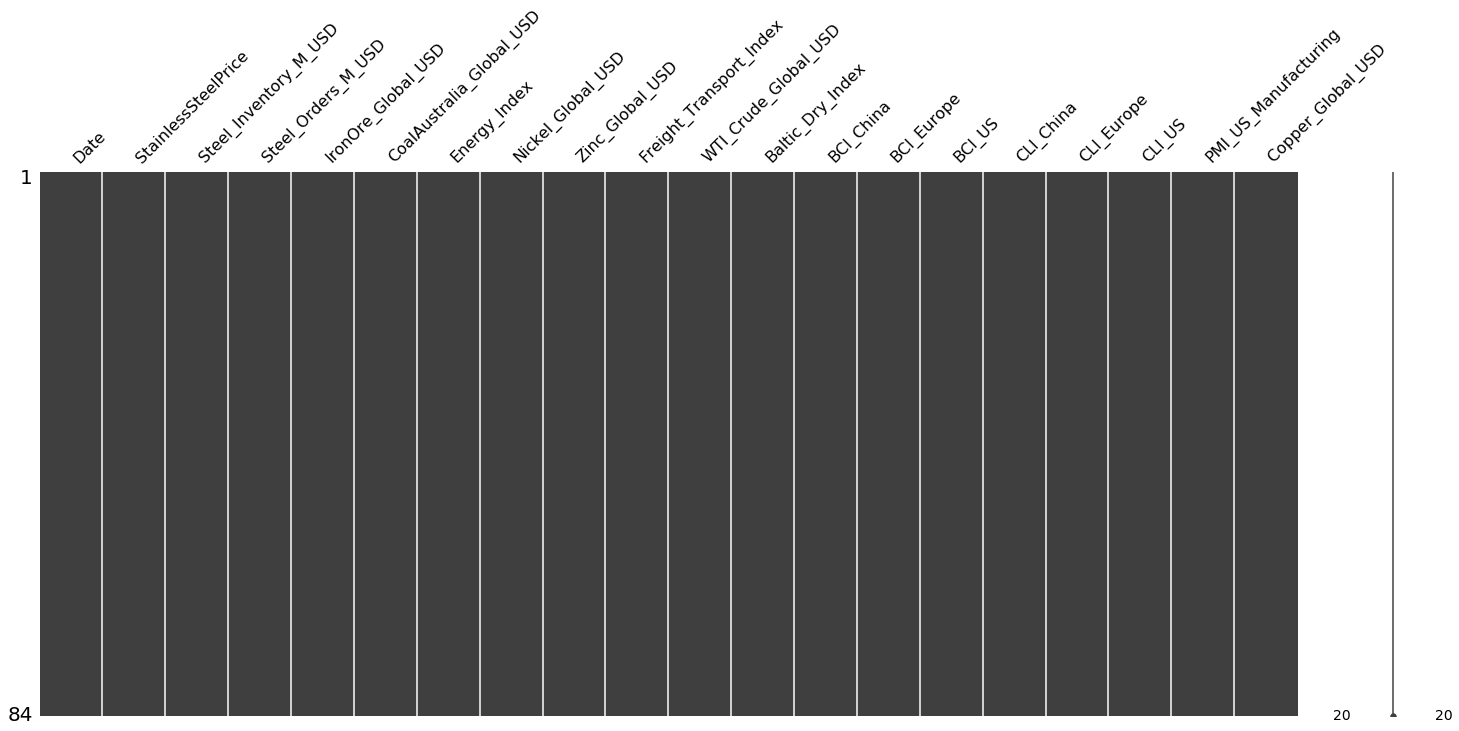

In [497]:
#missing cells check

msno.matrix(data_steel)

In [498]:
#Nan values check 

data_steel.isna().sum()

Date                        0
StainlessSteelPrice         0
Steel_Inventory_M_USD       0
Steel_Orders_M_USD          0
IronOre_Global_USD          0
CoalAustralia_Global_USD    0
Energy_Index                0
Nickel_Global_USD           0
Zinc_Global_USD             0
Freight_Transport_Index     0
WTI_Crude_Global_USD        0
Baltic_Dry_Index            0
BCI_China                   0
BCI_Europe                  0
BCI_US                      0
CLI_China                   0
CLI_Europe                  0
CLI_US                      0
PMI_US_Manufacturing        0
Copper_Global_USD           0
dtype: int64

In [499]:
#plotting the "StainlessSteelPrice" column

plot_data = [
    go.Scatter(
    x = data_steel['Date'],
    y = data_steel['StainlessSteelPrice'],
    )
]
plot_layout = go.Layout(
    title = 'Montly Sales of Steel')

fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

In [500]:
#plotting 'iron, nickle and energy index'

#plotting the "StainlessSteelPrice" column

plot_data = [
    go.Scatter(
    x = data_steel['Date'],
    y = data_steel['Steel_Inventory_M_USD'],
    name = "Inventory"
    ),
    go.Scatter(
    x = data_steel['Date'],
    y = data_steel['Steel_Orders_M_USD'],
    name = "Orders"
    )
]


plot_layout = go.Layout(
    title = 'Order and Inventory')

fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

In [501]:
#Normalizing the columns that are needed

df_normalized = data_steel.copy()
  
df_normalized['StainlessSteelPrice'] = MinMaxScaler().fit_transform(np.array(df_normalized['StainlessSteelPrice']).reshape(-1,1))
df_normalized['IronOre_Global_USD'] = MinMaxScaler().fit_transform(np.array(df_normalized['IronOre_Global_USD']).reshape(-1,1))
df_normalized['Nickel_Global_USD'] = MinMaxScaler().fit_transform(np.array(df_normalized['Nickel_Global_USD']).reshape(-1,1))
df_normalized['Zinc_Global_USD'] = MinMaxScaler().fit_transform(np.array(df_normalized['Zinc_Global_USD']).reshape(-1,1))
df_normalized['Steel_Inventory_M_USD'] = MinMaxScaler().fit_transform(np.array(df_normalized['Steel_Inventory_M_USD']).reshape(-1,1))
df_normalized['Steel_Orders_M_USD'] = MinMaxScaler().fit_transform(np.array(df_normalized['Steel_Orders_M_USD']).reshape(-1,1))
df_normalized['CoalAustralia_Global_USD'] = MinMaxScaler().fit_transform(np.array(df_normalized['CoalAustralia_Global_USD']).reshape(-1,1))
df_normalized['Energy_Index'] = MinMaxScaler().fit_transform(np.array(df_normalized['Energy_Index']).reshape(-1,1))

# def normalize(dataset):
#     dataNorm=((dataset-dataset.min())/(dataset.max()-dataset.min()))*20
#     dataNorm["Date"]=dataset["Date"]
#     dataNorm['Freight_Transport_Index'] = dataset['Freight_Transport_Index']
    
#     return dataNorm

# df_normalized = normalize(df_normalized)
df_normalized.head()


Date  StainlessSteelPrice  Steel_Inventory_M_USD  Steel_Orders_M_USD  \
0 2013-07-01             0.569401               0.573642            0.698922   
1 2013-08-01             0.452681               0.578660            0.759521   
2 2013-09-01             0.495268               0.601092            0.748263   
3 2013-10-01             0.468454               0.597255            0.872096   
4 2013-11-01             0.435331               0.614817            0.936287   

   IronOre_Global_USD  CoalAustralia_Global_USD  Energy_Index  \
0            0.897437                  0.401823      0.944773   
1            1.000000                  0.401810      0.973028   
2            0.970165                  0.416805      0.984422   
3            0.953393                  0.446777      0.957629   
4            0.992397                  0.487522      0.936175   

   Nickel_Global_USD  Zinc_Global_USD  Freight_Transport_Index  \
0           0.491041         0.157640                     -0.4   
1           0.541294         0.186844                      0.5   
2           0.495641         0.162242                      0.1   
3           0.524126         0.181102                     -0.1   
4           0.485069         0.171949                      2.1   

   WTI_Crude_Global_USD  Baltic_Dry_Index  BCI_China  BCI_Europe    BCI_US  \
0            104.545217              1062   98.80018    99.64265  100.1044   
1            106.546364              1132   99.04874    99.91766  100.3962   
2            106.313809              2003   99.27196   100.18490  100.5363   
3            100.500435              1504   99.40488   100.36330  100.5771   
4             93.812381              1821   99.36221   100.49830  100.5459   

   CLI_China  CLI_Europe    CLI_US  PMI_US_Manufacturing  Copper_Global_USD   
0   101.1423    99.43615  100.6230                  50.9             6906.64  
1   101.1938    99.64082  100.6545                  55.4             7186.25  
2   101.2066    99.84383  100.6646                  55.7             7159.27  
3   101.1835   100.02300  100.6666                  56.2             7203.02  
4   101.1283   100.17150  100.6744                  56.4             7070.65

In [502]:


plot_data = [
    go.Scatter(
    x = df_normalized['Date'],
    y = df_normalized['IronOre_Global_USD'],
    name = "IronOre"
    ),
    go.Scatter(
    x = df_normalized['Date'],
    y = df_normalized['Nickel_Global_USD'],
    name = "Nickel"
    ),
    go.Scatter(
    x = df_normalized['Date'],
    y = df_normalized['StainlessSteelPrice'],
    name = "Price"
    ),
    go.Scatter(
    x = df_normalized['Date'],
    y = df_normalized['Zinc_Global_USD'],
    name = "Zinc"
    )
]


plot_layout = go.Layout(
    title = 'Nickel, Iron and Steel Price')

fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

In [13]:
plot_data = [
    
    go.Scatter(
    x = df_normalized['Date'],
    y = df_normalized['Steel_Inventory_M_USD'],
    name = "Inventory"
    ),
    go.Scatter(
    x = df_normalized['Date'],
    y = df_normalized['StainlessSteelPrice'],
    name = "Price"
    ),
    go.Scatter(
    x = df_normalized['Date'],
    y = df_normalized['Steel_Orders_M_USD'],
    name = "Orders"
    )
]


plot_layout = go.Layout(
    title = 'Order and Inventory against Price')

fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

Now fixing the datafrmae index for applying some statistical forcasting model

In [503]:
#date as index

df_normalized.set_index("Date", inplace=True)


In [504]:
#First I will apply simple model to see the results. 

#Checking if the StainlessSteelPrice column is stationary or non-stationary. From the plot before it seems like that it is non-stationary data.

#Running Dicky-Fuller Test

sts.adfuller(df_normalized.StainlessSteelPrice)

##The result shows that the p value is not less than 0.05 and thus it is not actually significant. 

(-2.346563574044855,
 0.15738956399879,
 1,
 82,
 {'1%': -3.512738056978279,
  '5%': -2.8974898650628984,
  '10%': -2.585948732897085},
 -150.87555705963445)

In [505]:
#setting up frequency as Monthly

df_normalized.index.freq = "MS"

In [506]:
df_normalized.index

DatetimeIndex(['2013-07-01', '2013-08-01', '2013-09-01', '2013-10-01',
               '2013-11-01', '2013-12-01', '2014-01-01', '2014-02-01',
               '2014-03-01', '2014-04-01', '2014-05-01', '2014-06-01',
               '2014-07-01', '2014-08-01', '2014-09-01', '2014-10-01',
               '2014-11-01', '2014-12-01', '2015-01-01', '2015-02-01',
               '2015-03-01', '2015-04-01', '2015-05-01', '2015-06-01',
               '2015-07-01', '2015-08-01', '2015-09-01', '2015-10-01',
               '2015-11-01', '2015-12-01', '2016-01-01', '2016-02-01',
               '2016-03-01', '2016-04-01', '2016-05-01', '2016-06-01',
               '2016-07-01', '2016-08-01', '2016-09-01', '2016-10-01',
               '2016-11-01', '2016-12-01', '2017-01-01', '2017-02-01',
               '2017-03-01', '2017-04-01', '2017-05-01', '2017-06-01',
               '2017-07-01', '2017-08-01', '2017-09-01', '2017-10-01',
               '2017-11-01', '2017-12-01', '2018-01-01', '2018-02-01',
      

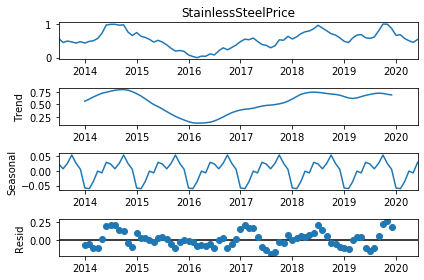

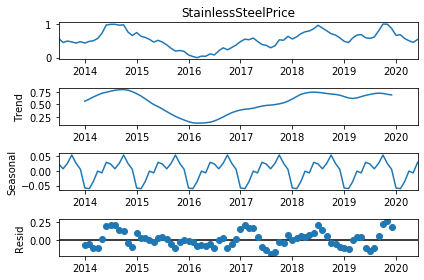

In [507]:
#Checking for seasonality

s_dec_additive = seasonal_decompose(df_normalized.StainlessSteelPrice, model= "additive")
s_dec_additive.plot()

In [508]:
df_normalized.head()

StainlessSteelPrice  Steel_Inventory_M_USD  Steel_Orders_M_USD  \
Date                                                                         
2013-07-01             0.569401               0.573642            0.698922   
2013-08-01             0.452681               0.578660            0.759521   
2013-09-01             0.495268               0.601092            0.748263   
2013-10-01             0.468454               0.597255            0.872096   
2013-11-01             0.435331               0.614817            0.936287   

            IronOre_Global_USD  CoalAustralia_Global_USD  Energy_Index  \
Date                                                                     
2013-07-01            0.897437                  0.401823      0.944773   
2013-08-01            1.000000                  0.401810      0.973028   
2013-09-01            0.970165                  0.416805      0.984422   
2013-10-01            0.953393                  0.446777      0.957629   
2013-11-01            0.992397                  0.487522      0.936175   

            Nickel_Global_USD  Zinc_Global_USD  Freight_Transport_Index  \
Date                                                                      
2013-07-01           0.491041         0.157640                     -0.4   
2013-08-01           0.541294         0.186844                      0.5   
2013-09-01           0.495641         0.162242                      0.1   
2013-10-01           0.524126         0.181102                     -0.1   
2013-11-01           0.485069         0.171949                      2.1   

            WTI_Crude_Global_USD  Baltic_Dry_Index  BCI_China  BCI_Europe  \
Date                                                                        
2013-07-01            104.545217              1062   98.80018    99.64265   
2013-08-01            106.546364              1132   99.04874    99.91766   
2013-09-01            106.313809              2003   99.27196   100.18490   
2013-10-01            100.500435              1504   99.40488   100.36330   
2013-11-01             93.812381              1821   99.36221   100.49830   

              BCI_US  CLI_China  CLI_Europe    CLI_US  PMI_US_Manufacturing  \
Date                                                                          
2013-07-01  100.1044   101.1423    99.43615  100.6230                  50.9   
2013-08-01  100.3962   101.1938    99.64082  100.6545                  55.4   
2013-09-01  100.5363   101.2066    99.84383  100.6646                  55.7   
2013-10-01  100.5771   101.1835   100.02300  100.6666                  56.2   
2013-11-01  100.5459   101.1283   100.17150  100.6744                  56.4   

            Copper_Global_USD   
Date                            
2013-07-01             6906.64  
2013-08-01             7186.25  
2013-09-01             7159.27  
2013-10-01             7203.02  
2013-11-01             7070.65

In [509]:
#dropping unnecessary coloumns

df_normalized = df_normalized.drop(['Freight_Transport_Index', 'WTI_Crude_Global_USD', 'Baltic_Dry_Index', 'BCI_China', 'BCI_Europe', 'BCI_US', 'CLI_China', 'CLI_Europe', 'CLI_US', 'PMI_US_Manufacturing'], axis = 1)


In [510]:
df_normalized['Copper_Global_USD '] = MinMaxScaler().fit_transform(np.array(df_normalized['Copper_Global_USD ']).reshape(-1,1))


## ACF

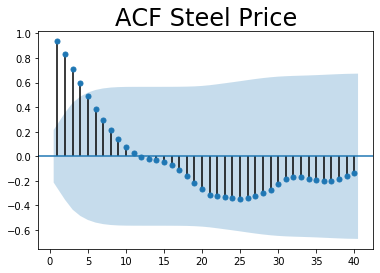

In [511]:
sgt.plot_acf(df_normalized.StainlessSteelPrice, lags = 40, zero = False)
plt.title("ACF Steel Price", size = 24)
plt.show()

Only first 3 lags showing significance

## PACF

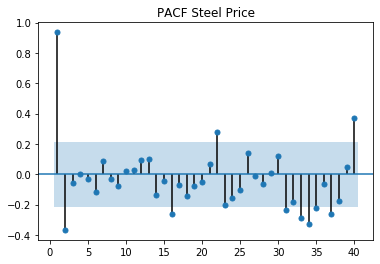

In [512]:
sgt.plot_pacf(df_normalized.StainlessSteelPrice, lags = 40, zero = False, method = ('ols'))
plt.title("PACF Steel Price")
plt.show()

first two and 16 th lag and after that some significant values

In [513]:
#Dataset size and train and test set for models


size = int(len(df_normalized)*0.8)
df_train, df_test = df_normalized.iloc[:size], df_normalized.iloc[size:]

In [514]:
df_train.tail()

StainlessSteelPrice  Steel_Inventory_M_USD  Steel_Orders_M_USD  \
Date                                                                         
2018-09-01             0.798107               0.686983            0.908503   
2018-10-01             0.714511               0.694953            0.845030   
2018-11-01             0.672713               0.746606            0.857246   
2018-12-01             0.591483               0.795897            0.882395   
2019-01-01             0.487382               0.819510            0.730060   

            IronOre_Global_USD  CoalAustralia_Global_USD  Energy_Index  \
Date                                                                     
2018-09-01            0.290285                  0.960133      0.657765   
2018-10-01            0.323785                  0.855928      0.656045   
2018-11-01            0.326631                  0.755321      0.523565   
2018-12-01            0.291374                  0.735653      0.436881   
2019-01-01            0.356832                  0.725294      0.436629   

            Nickel_Global_USD  Zinc_Global_USD  Copper_Global_USD   
Date                                                                
2018-09-01           0.379358         0.454308            0.559982  
2018-10-01           0.361755         0.573063            0.619858  
2018-11-01           0.264913         0.534316            0.611463  
2018-12-01           0.228468         0.544550            0.568692  
2019-01-01           0.290436         0.521402            0.520382

In [515]:
df_test.head()

StainlessSteelPrice  Steel_Inventory_M_USD  Steel_Orders_M_USD  \
Date                                                                         
2019-02-01             0.449527               0.795602            0.798084   
2019-03-01             0.582808               0.747639            0.838084   
2019-04-01             0.672713               0.723731            0.726946   
2019-05-01             0.687697               0.670012            0.660838   
2019-06-01             0.593849               0.647285            0.673533   

            IronOre_Global_USD  CoalAustralia_Global_USD  Energy_Index  \
Date                                                                     
2019-02-01            0.485663                  0.668856      0.451522   
2019-03-01            0.480271                  0.645310      0.463491   
2019-04-01            0.557513                  0.493123      0.493376   
2019-05-01            0.633012                  0.504283      0.469749   
2019-06-01            0.714003                  0.337733      0.383659   

            Nickel_Global_USD  Zinc_Global_USD  Copper_Global_USD   
Date                                                                
2019-02-01           0.395109         0.589716            0.648549  
2019-03-01           0.425827         0.660973            0.697835  
2019-04-01           0.402995         0.701745            0.697444  
2019-05-01           0.334860         0.607416            0.548328  
2019-06-01           0.328342         0.537065            0.500213

In [516]:
#start and end date for the test set

start_date = '2019-02-01'
end_date = '2020-06-01'

In [517]:
#directional Symmetry

def directional(y, y_hat):
    n = len(y)
    yd = np.array(y)
    y_hatd = np.array(y_hat)
    
    i = 1
    nsum =0
    for i in range(1, len(yd)):

        if(((yd[i]-yd[i-1]) * (y_hatd[i]-y_hatd[i-1])) > 0):
            value = 1
            nsum = nsum + value
    result = np.multiply(np.divide(100, n-1), nsum)
    return result

# Models


### Applying AR Model

In [518]:
model_ar = AR(df_train.StainlessSteelPrice)
model_fit = model_ar.fit()

In [519]:
#Lags and Beta value
print('Lag: %s' % model_fit.k_ar)
print('Coefficients: %s' % model_fit.params)

Lag: 11
Coefficients: const                      0.059765
L1.StainlessSteelPrice     1.151448
L2.StainlessSteelPrice    -0.110019
L3.StainlessSteelPrice     0.026721
L4.StainlessSteelPrice    -0.153336
L5.StainlessSteelPrice     0.050704
L6.StainlessSteelPrice    -0.193615
L7.StainlessSteelPrice     0.128390
L8.StainlessSteelPrice     0.119537
L9.StainlessSteelPrice    -0.057199
L10.StainlessSteelPrice   -0.098171
L11.StainlessSteelPrice    0.005023
dtype: float64


In [520]:
pred_ar = model_fit.predict(start=len(df_train), end=len(df_train)+len(df_test)-1, dynamic=False)

In [521]:
print('The first test Price :',df_test.StainlessSteelPrice.values[1],'and its Predicted Price : ',pred_ar.values[1])

The first test Price : 0.5828075703924225 and its Predicted Price :  0.4161351653627768


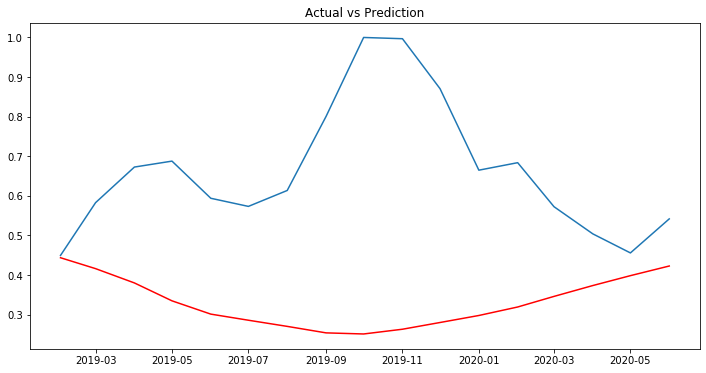

In [522]:
# plotting results
plt.figure(figsize=(12,6))
plt.plot(df_test.StainlessSteelPrice)
plt.plot(pred_ar, color='red')
plt.title("Actual vs Prediction")
plt.show()

In [569]:
# Mean Absolute Percentage Error
abs_error = np.abs(df_test['StainlessSteelPrice']-pred_ar)
actual = df_test['StainlessSteelPrice']
mape = np.round(np.mean(abs_error/actual),3)
resultsDf = pd.DataFrame({'Method':['Auto Regressive']})
resultsDf
mape

0.455

In [570]:
dire = directional(df_test['StainlessSteelPrice'], pred_ar)

In [571]:
resultsDf = pd.DataFrame({'Method':['Auto Regressive'], 'MAPE': [mape], 'DS': [dire]})
resultsDf = resultsDf[['Method', 'MAPE', 'DS']]
resultsDf

Method   MAPE    DS
0  Auto Regressive  0.455  25.0

This result shows that simple model can not actually predict the price good and the it miscalculated the upward and downward trends as well. Let's try with the differences between prices. 

### ARIMA Model

In [526]:
# Define the p and q parameters
p = range(0, 7)
q = range(0,2)

In [527]:
pq = list(itertools.product(p,q))

In [528]:
best_aic = np.inf
best_pq = None
temp_model = None
for param in pq: 
    temp_model = ARMA(df_train.StainlessSteelPrice,order=param)
    results = temp_model.fit()
    if results.aic < best_aic:
        best_aic = results.aic
        best_pq = param
print("Best ARMA {} model - AIC:{}".format(best_pq,best_aic))

Best ARMA (2, 1) model - AIC:-144.2231389591198


In [529]:
# using the best parameter in the model
model_arma = ARMA(df_train.StainlessSteelPrice,order=(2,1))
model_fit = model_arma.fit()


In [530]:
print('Lag: %s' % model_fit.k_ar)
print('Coefficients: %s' % model_fit.params)

Lag: 2
Coefficients: const                        0.499623
ar.L1.StainlessSteelPrice    1.794681
ar.L2.StainlessSteelPrice   -0.836492
ma.L1.StainlessSteelPrice   -0.657086
dtype: float64


In [531]:
pred_airma = model_fit.predict(start=len(df_train), end=len(df_train)+len(df_test)-1)

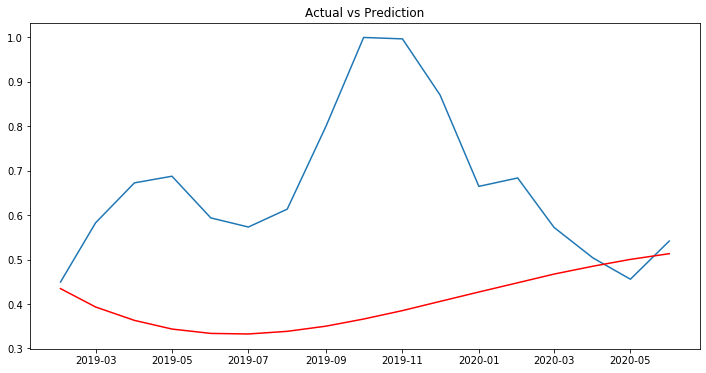

In [532]:
plt.figure(figsize=(12,6))
plt.plot(df_test.StainlessSteelPrice)
plt.plot(pred_airma, color='red')
plt.title("Actual vs Prediction")
plt.show()

In [572]:
abs_error = np.abs(df_test['StainlessSteelPrice']-predictions)
actual = df_test['StainlessSteelPrice']
mape = np.round(np.mean(abs_error/actual),3)

In [573]:
dire = directional(df_test['StainlessSteelPrice'], predictions)

In [574]:
tempResultsDf = pd.DataFrame({'Method':['Auto Regressive Moving average '], 'MAPE': [mape], 'DS': [dire]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf

Method   MAPE     DS
0                  Auto Regressive  0.455  25.00
0  Auto Regressive Moving average   0.355  43.75

### Autoregressive Integrated Moving Average (ARIMA)

In [536]:
model_auto_arima = auto_arima(df_train.StainlessSteelPrice)

In [537]:
model_auto_arima

ARIMA(maxiter=50, method='lbfgs', order=(4, 0, 0), out_of_sample_size=0,
      scoring='mse', scoring_args={}, seasonal_order=(0, 0, 0, 0),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=True)

In [538]:
model_auto_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   67
Model:               SARIMAX(4, 0, 0)   Log Likelihood                  77.297
Date:                Sun, 13 Jun 2021   AIC                           -142.594
Time:                        21:28:59   BIC                           -129.366
Sample:                             0   HQIC                          -137.359
                                 - 67                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0521      0.023      2.246      0.025       0.007       0.098
ar.L1          1.1386      0.141      8.058      0.000       0.862       1.416
ar.L2         -0.0817      0.240     -0.340      0.734      -0.552       0.389
ar.L3          0.0262      0.196      0.134      0.893      -0.357       0.410
ar.L4         -0.1862      0.158     -1.175      0.240      -0.497       0.124
sigma2         0.0056      0.001      5.326      0.000       0.004       0.008
===================================================================================
Ljung-Box (Q):                       36.42   Jarque-Bera (JB):                 1.89
Prob(Q):                              0.63   Prob(JB):                         0.39
Heteroskedasticity (H):               0.79   Skew:                             0.40
Prob(H) (two-sided):                  0.59   Kurtosis:                         3.17
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

#### ARIMA With out any exogenous Values

In [540]:


##model auto arima with out any exogenous values

model_auto_arima_wa = auto_arima(df_normalized.StainlessSteelPrice, 
                       max_order = None, max_p = 7, max_q = 7, max_d = 2, max_P = 4, max_Q = 4, max_D = 2,
                       maxiter = 50, alpha = 0.05, n_jobs = -1, trend = 'ct', information_criterion = 'oob',
                       out_of_sample = int(len(df_normalized)*0.2))

In [541]:
model_auto_arima_wa.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   84
Model:               SARIMAX(2, 0, 0)   Log Likelihood                  90.681
Date:                Sun, 13 Jun 2021   AIC                           -171.362
Time:                        21:29:29   BIC                           -159.207
Sample:                             0   HQIC                          -166.476
                                 - 84                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0444      0.026      1.688      0.091      -0.007       0.096
drift          0.0001      0.000      0.371      0.711      -0.001       0.001
ar.L1          1.2792      0.104     12.251      0.000       1.075       1.484
ar.L2         -0.3688      0.107     -3.452      0.001      -0.578      -0.159
sigma2         0.0066      0.001      5.196      0.000       0.004       0.009
===================================================================================
Ljung-Box (Q):                       30.62   Jarque-Bera (JB):                 1.82
Prob(Q):                              0.86   Prob(JB):                         0.40
Heteroskedasticity (H):               0.91   Skew:                             0.25
Prob(H) (two-sided):                  0.81   Kurtosis:                         2.48
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [549]:
df_auto_pred_wa = pd.DataFrame(model_auto_arima_wa.predict(n_periods = len(df_test[start_date:end_date])),
                              index = df_test[start_date:end_date].index)

In [550]:
df_auto_pred_wa.head()

0
Date                
2019-02-01  0.580436
2019-03-01  0.598289
2019-04-01  0.607006
2019-05-01  0.611705
2019-06-01  0.614632

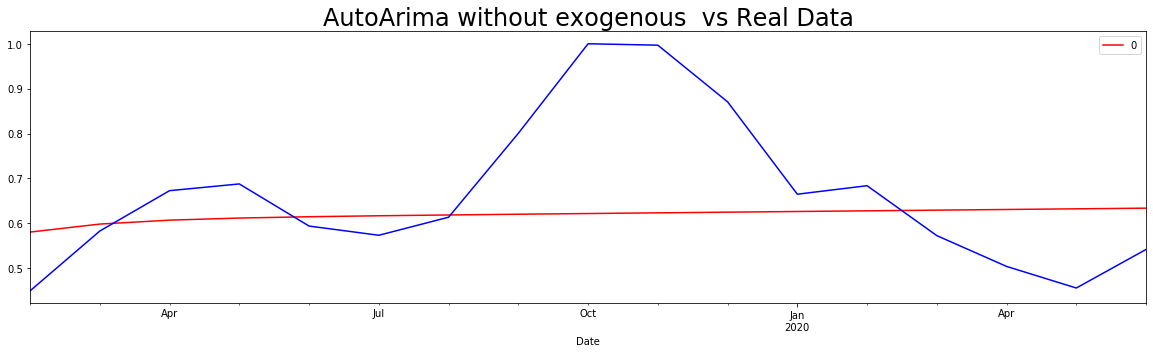

In [551]:
df_auto_pred_wa.plot(figsize = (20,5), color = "red")
df_test.StainlessSteelPrice[start_date:end_date].plot(color = "blue")
plt.title("AutoArima without exogenous  vs Real Data", size = 24)
plt.show()

In [575]:
abs_error = np.abs(df_test['StainlessSteelPrice']-df_auto_pred_wa.iloc[:, 0])
actual = df_test['StainlessSteelPrice']
mape = np.round(np.mean(abs_error/actual),3)

In [576]:
dire = directional(df_test['StainlessSteelPrice'], df_auto_pred_wa.iloc[:, 0])

In [577]:
tempResultsDf = pd.DataFrame({'Method':['(ARIMA) Without any Exogenous '], 'MAPE': [mape], 'DS': [dire] })
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf

Method   MAPE     DS
0                  Auto Regressive  0.455  25.00
0  Auto Regressive Moving average   0.355  43.75
0   (ARIMA) Without any Exogenous   0.174  50.00

#### ARIMA with One Feature

In [558]:
#let's try with one parameters 

model_auto_arima_wo = auto_arima(df_normalized.StainlessSteelPrice, exogenous = df_normalized[['IronOre_Global_USD']],
                       max_order = None, max_p = 7, max_q = 7, max_d = 2, max_P = 4, max_Q = 4, max_D = 2,
                       maxiter = 50, alpha = 0.05, n_jobs = -1, trend = 'ct', information_criterion = 'oob',
                       out_of_sample = int(len(df_normalized)*0.1))

In [559]:
model_auto_arima_wo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   84
Model:               SARIMAX(2, 0, 0)   Log Likelihood                  89.874
Date:                Sun, 13 Jun 2021   AIC                           -167.748
Time:                        21:42:28   BIC                           -153.163
Sample:                    07-01-2013   HQIC                          -161.885
                         - 06-01-2020                                         
Covariance Type:                  opg                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
intercept              0.0690      0.026      2.624      0.009       0.017       0.121
drift                  0.0002      0.000      0.626      0.531      -0.000       0.001
IronOre_Global_USD    -0.0255      0.144     -0.177      0.860      -0.309       0.258
ar.L1                  1.2339      0.107     11.507      0.000       1.024       1.444
ar.L2                 -0.3770      0.106     -3.540      0.000      -0.586      -0.168
sigma2                 0.0067      0.001      5.058      0.000       0.004       0.009
===================================================================================
Ljung-Box (Q):                       37.10   Jarque-Bera (JB):                 2.21
Prob(Q):                              0.60   Prob(JB):                         0.33
Heteroskedasticity (H):               0.84   Skew:                             0.30
Prob(H) (two-sided):                  0.65   Kurtosis:                         2.49
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [562]:
#predictions = model_auto_arima.predict(start=len(df_train), end=len(df_train)+len(df_test)-1, 
                                     #  exogenous = df_test[['IronOre_Global_USD', 'Nickel_Global_USD', 'Zinc_Global_USD']][start_date:end_date])



df_auto_pred_wo = pd.DataFrame(model_auto_arima_wo.predict(n_periods = len(df_test[start_date:end_date]),
                           exogenous = df_test[['IronOre_Global_USD']][start_date:end_date]),
                            index = df_test[start_date:end_date].index)

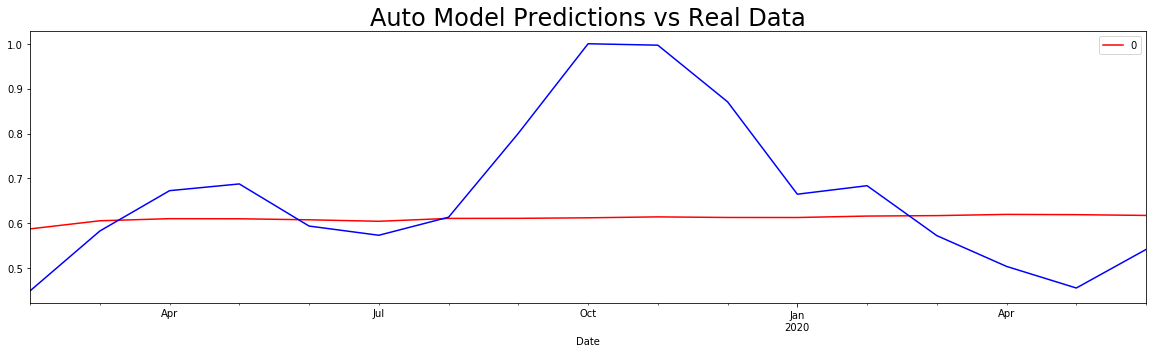

In [563]:
df_auto_pred_wo.plot(figsize = (20,5), color = "red")
df_test.StainlessSteelPrice[start_date:end_date].plot(color = "blue")
plt.title("Auto Model Predictions vs Real Data", size = 24)
plt.show()

In [159]:
df_auto_pred.head()

0
Date                
2019-02-01  0.653427
2019-03-01  0.680289
2019-04-01  0.670486
2019-05-01  0.658994
2019-06-01  0.631854

In [160]:
df_auto_pred.iloc[:, 0]

Date
2019-02-01    0.653427
2019-03-01    0.680289
2019-04-01    0.670486
2019-05-01    0.658994
2019-06-01    0.631854
2019-07-01    0.562696
2019-08-01    0.565430
2019-09-01    0.522335
2019-10-01    0.541243
2019-11-01    0.588201
2019-12-01    0.587677
2020-01-01    0.580770
2020-02-01    0.603014
2020-03-01    0.607500
2020-04-01    0.614050
2020-05-01    0.584123
2020-06-01    0.539484
Freq: MS, Name: 0, dtype: float64

In [578]:
abs_error = np.abs(df_test['StainlessSteelPrice']-df_auto_pred_wo.iloc[:, 0])
actual = df_test['StainlessSteelPrice']
mape = np.round(np.mean(abs_error/actual),3)

In [579]:
dire = directional(df_test['StainlessSteelPrice'], df_auto_pred_wo.iloc[:, 0])

In [580]:
tempResultsDf = pd.DataFrame({'Method':['(ARIMA) one Exogenous '], 'MAPE': [mape], 'DS': [dire] })
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf

Method   MAPE     DS
0                  Auto Regressive  0.455  25.00
0  Auto Regressive Moving average   0.355  43.75
0   (ARIMA) Without any Exogenous   0.174  50.00
0           (ARIMA) one Exogenous   0.172  68.75

Result shows a bit improvement

#### One Parameter (Inventory)

In [603]:
#let's try with one parameter (Orders) 

model_auto_arima_wo_inve = auto_arima(df_normalized.StainlessSteelPrice, exogenous = df_normalized[['Steel_Inventory_M_USD']],
                       max_order = None, max_p = 7, max_q = 7, max_d = 2, max_P = 4, max_Q = 4, max_D = 2,
                       maxiter = 50, alpha = 0.05, n_jobs = -1, trend = 'ct', information_criterion = 'oob',
                       out_of_sample = int(len(df_normalized)*0.1))

In [604]:
model_auto_arima_wo_inve.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   84
Model:               SARIMAX(1, 1, 0)   Log Likelihood                  88.992
Date:                Sun, 13 Jun 2021   AIC                           -167.984
Time:                        22:22:28   BIC                           -155.890
Sample:                    07-01-2013   HQIC                          -163.125
                         - 06-01-2020                                         
Covariance Type:                  opg                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
intercept                 0.0039      0.018      0.221      0.825      -0.031       0.039
drift                 -3.942e-05      0.000     -0.115      0.908      -0.001       0.001
Steel_Inventory_M_USD     0.3896      0.275      1.419      0.156      -0.149       0.928
ar.L1                     0.3263      0.109      2.981      0.003       0.112       0.541
sigma2                    0.0068      0.001      5.546      0.000       0.004       0.009
===================================================================================
Ljung-Box (Q):                       36.61   Jarque-Bera (JB):                 0.71
Prob(Q):                              0.62   Prob(JB):                         0.70
Heteroskedasticity (H):               1.19   Skew:                             0.08
Prob(H) (two-sided):                  0.65   Kurtosis:                         2.58
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [605]:
df_auto_pred_wo_inve = pd.DataFrame(model_auto_arima_wo_inve.predict(n_periods = len(df_test[start_date:end_date]),
                           exogenous = df_test[['Steel_Inventory_M_USD']][start_date:end_date]),
                            index = df_test[start_date:end_date].index)

In [606]:
abs_error = np.abs(df_test['StainlessSteelPrice']-df_auto_pred_wo_inve.iloc[:, 0])
actual = df_test['StainlessSteelPrice']
mape = np.round(np.mean(abs_error/actual),3)

In [607]:
dire = directional(df_test['StainlessSteelPrice'], df_auto_pred_wo_inve.iloc[:, 0])

In [608]:
tempResultsDf = pd.DataFrame({'Method':['(ARIMA) one Exogenous (Inventory) '], 'MAPE': [mape], 'DS': [dire] })
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf

Method   MAPE     DS
0                            Auto Regressive  0.455  25.00
0            Auto Regressive Moving average   0.355  43.75
0             (ARIMA) Without any Exogenous   0.174  50.00
0                     (ARIMA) one Exogenous   0.172  68.75
0                     (ARIMA) two Exogenous   0.348  50.00
0            (ARIMA) two Exogenous (Ir, Zi)   0.169  68.75
0  (ARIMA) two Exogenous (Order, Inventory)   0.257  43.75
0         (ARIMA) one Exogenous (Inventory)   0.223  37.50

This result also doesn't seems that good

#### ARIMA two Exog (Iron, Nickel)

In [582]:
#let's try with two parameters 

model_auto_arima_w2 = auto_arima(df_normalized.StainlessSteelPrice, exogenous = df_normalized[['IronOre_Global_USD', 'Nickel_Global_USD']],
                       max_order = None, max_p = 7, max_q = 7, max_d = 2, max_P = 4, max_Q = 4, max_D = 2,
                       maxiter = 50, alpha = 0.05, n_jobs = -1, trend = 'ct', information_criterion = 'oob',
                       out_of_sample = int(len(df_normalized)*0.1))

In [584]:
model_auto_arima_w2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   84
Model:               SARIMAX(1, 1, 2)   Log Likelihood                  89.854
Date:                Sun, 13 Jun 2021   AIC                           -163.708
Time:                        22:04:41   BIC                           -144.358
Sample:                    07-01-2013   HQIC                          -155.934
                         - 06-01-2020                                         
Covariance Type:                  opg                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
intercept             -0.0110      0.026     -0.421      0.674      -0.062       0.040
drift                  0.0002      0.001      0.477      0.633      -0.001       0.001
IronOre_Global_USD    -0.1974      0.148     -1.338      0.181      -0.487       0.092
Nickel_Global_USD     -0.2844      0.124     -2.298      0.022      -0.527      -0.042
ar.L1                  0.2892      0.381      0.759      0.448      -0.458       1.036
ma.L1                  0.1982      0.344      0.577      0.564      -0.475       0.872
ma.L2                  0.1625      0.197      0.825      0.409      -0.223       0.548
sigma2                 0.0066      0.001      5.232      0.000       0.004       0.009
===================================================================================
Ljung-Box (Q):                       31.55   Jarque-Bera (JB):                 0.64
Prob(Q):                              0.83   Prob(JB):                         0.73
Heteroskedasticity (H):               1.12   Skew:                            -0.04
Prob(H) (two-sided):                  0.77   Kurtosis:                         2.58
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [583]:
df_auto_pred_w2 = pd.DataFrame(model_auto_arima_w2.predict(n_periods = len(df_test[start_date:end_date]),
                           exogenous = df_test[['IronOre_Global_USD', 'Nickel_Global_USD']][start_date:end_date]),
                            index = df_test[start_date:end_date].index)

In [585]:
abs_error = np.abs(df_test['StainlessSteelPrice']-df_auto_pred_w2.iloc[:, 0])
actual = df_test['StainlessSteelPrice']
mape = np.round(np.mean(abs_error/actual),3)

In [586]:
dire = directional(df_test['StainlessSteelPrice'], df_auto_pred_w2.iloc[:, 0])

In [587]:
tempResultsDf = pd.DataFrame({'Method':['(ARIMA) two Exogenous '], 'MAPE': [mape], 'DS': [dire] })
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf

Method   MAPE     DS
0                  Auto Regressive  0.455  25.00
0  Auto Regressive Moving average   0.355  43.75
0   (ARIMA) Without any Exogenous   0.174  50.00
0           (ARIMA) one Exogenous   0.172  68.75
0           (ARIMA) two Exogenous   0.348  50.00

This result show's that it hasn't improved. Let's replace Nickel and Insert Zinc

#### ARIMA With Two (Iron, Zinc)

In [588]:
#two exog (Iron and Zinc)

model_auto_arima_w2_z = auto_arima(df_normalized.StainlessSteelPrice, exogenous = df_normalized[['IronOre_Global_USD', 'Zinc_Global_USD']],
                       max_order = None, max_p = 7, max_q = 7, max_d = 2, max_P = 4, max_Q = 4, max_D = 2,
                       maxiter = 50, alpha = 0.05, n_jobs = -1, trend = 'ct', information_criterion = 'oob',
                       out_of_sample = int(len(df_normalized)*0.1))

In [589]:
model_auto_arima_w2_z.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   84
Model:               SARIMAX(1, 0, 2)   Log Likelihood                  90.534
Date:                Sun, 13 Jun 2021   AIC                           -165.068
Time:                        22:09:03   BIC                           -145.622
Sample:                    07-01-2013   HQIC                          -157.251
                         - 06-01-2020                                         
Covariance Type:                  opg                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
intercept              0.1057      0.052      2.029      0.042       0.004       0.208
drift                  0.0002      0.001      0.334      0.738      -0.001       0.001
IronOre_Global_USD    -0.1182      0.152     -0.779      0.436      -0.415       0.179
Zinc_Global_USD        0.0350      0.155      0.226      0.821      -0.269       0.339
ar.L1                  0.8065      0.077     10.466      0.000       0.655       0.957
ma.L1                  0.4672      0.140      3.340      0.001       0.193       0.741
ma.L2                  0.2918      0.123      2.379      0.017       0.051       0.532
sigma2                 0.0066      0.001      5.250      0.000       0.004       0.009
===================================================================================
Ljung-Box (Q):                       31.94   Jarque-Bera (JB):                 1.49
Prob(Q):                              0.81   Prob(JB):                         0.47
Heteroskedasticity (H):               0.77   Skew:                             0.23
Prob(H) (two-sided):                  0.48   Kurtosis:                         2.53
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [590]:
df_auto_pred_w2_z = pd.DataFrame(model_auto_arima_w2_z.predict(n_periods = len(df_test[start_date:end_date]),
                           exogenous = df_test[['IronOre_Global_USD', 'Zinc_Global_USD']][start_date:end_date]),
                            index = df_test[start_date:end_date].index)

In [591]:
abs_error = np.abs(df_test['StainlessSteelPrice']-df_auto_pred_w2_z.iloc[:, 0])
actual = df_test['StainlessSteelPrice']
mape = np.round(np.mean(abs_error/actual),3)

In [592]:
dire = directional(df_test['StainlessSteelPrice'], df_auto_pred_w2_z.iloc[:, 0])

In [593]:
tempResultsDf = pd.DataFrame({'Method':['(ARIMA) two Exogenous (Ir, Zi) '], 'MAPE': [mape], 'DS': [dire] })
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf

Method   MAPE     DS
0                  Auto Regressive  0.455  25.00
0  Auto Regressive Moving average   0.355  43.75
0   (ARIMA) Without any Exogenous   0.174  50.00
0           (ARIMA) one Exogenous   0.172  68.75
0           (ARIMA) two Exogenous   0.348  50.00
0  (ARIMA) two Exogenous (Ir, Zi)   0.169  68.75

This has surprisingly increased the DS and decreased MAPE

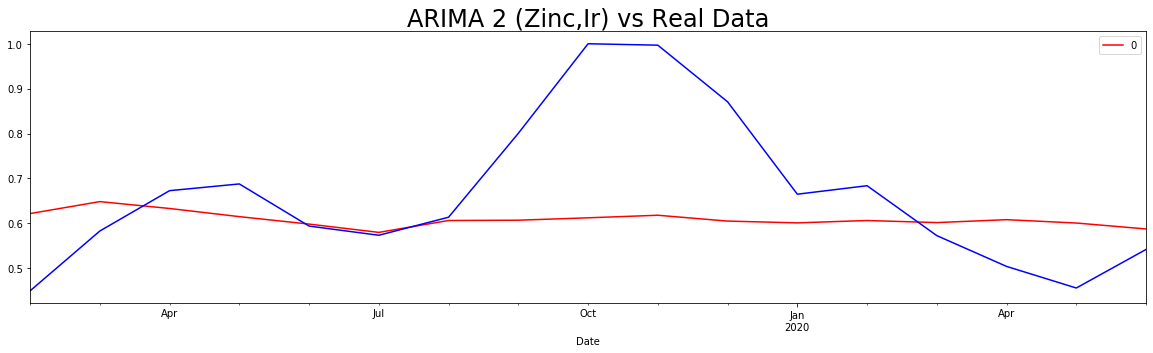

In [598]:
df_auto_pred_w2_z.plot(figsize = (20,5), color = "red")
df_test.StainlessSteelPrice[start_date:end_date].plot(color = "blue")
plt.title("ARIMA 2 (Zinc,Ir) vs Real Data", size = 24)
plt.show()

#### ARIMA with two (Inventory, Order)

In [595]:
#let's try with inventory and orders


model_auto_arima_w2_io = auto_arima(df_normalized.StainlessSteelPrice, exogenous = df_normalized[['Steel_Inventory_M_USD', 'Steel_Orders_M_USD']],
                       max_order = None, max_p = 7, max_q = 7, max_d = 2, max_P = 4, max_Q = 4, max_D = 2,
                       maxiter = 50, alpha = 0.05, n_jobs = -1, trend = 'ct', information_criterion = 'oob',
                       out_of_sample = int(len(df_normalized)*0.1))


In [596]:
model_auto_arima_w2_io.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   84
Model:               SARIMAX(1, 0, 2)   Log Likelihood                  96.034
Date:                Sun, 13 Jun 2021   AIC                           -176.067
Time:                        22:15:10   BIC                           -156.621
Sample:                    07-01-2013   HQIC                          -168.250
                         - 06-01-2020                                         
Covariance Type:                  opg                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
intercept                 0.0514      0.049      1.058      0.290      -0.044       0.147
drift                     0.0007      0.001      0.972      0.331      -0.001       0.002
Steel_Inventory_M_USD     0.5107      0.173      2.960      0.003       0.173       0.849
Steel_Orders_M_USD        0.0594      0.086      0.693      0.488      -0.109       0.228
ar.L1                     0.6991      0.123      5.699      0.000       0.459       0.940
ma.L1                     0.4362      0.141      3.101      0.002       0.160       0.712
ma.L2                     0.3364      0.144      2.337      0.019       0.054       0.619
sigma2                    0.0057      0.001      4.686      0.000       0.003       0.008
===================================================================================
Ljung-Box (Q):                       33.38   Jarque-Bera (JB):                 2.26
Prob(Q):                              0.76   Prob(JB):                         0.32
Heteroskedasticity (H):               1.02   Skew:                             0.25
Prob(H) (two-sided):                  0.95   Kurtosis:                         2.38
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [597]:
df_auto_pred_w2_io = pd.DataFrame(model_auto_arima_w2_io.predict(n_periods = len(df_test[start_date:end_date]),
                           exogenous = df_test[['Steel_Inventory_M_USD', 'Steel_Orders_M_USD']][start_date:end_date]),
                            index = df_test[start_date:end_date].index)

In [599]:
abs_error = np.abs(df_test['StainlessSteelPrice']-df_auto_pred_w2_io.iloc[:, 0])
actual = df_test['StainlessSteelPrice']
mape = np.round(np.mean(abs_error/actual),3)

In [600]:
dire = directional(df_test['StainlessSteelPrice'], df_auto_pred_w2_io.iloc[:, 0])

In [601]:
tempResultsDf = pd.DataFrame({'Method':['(ARIMA) two Exogenous (Order, Inventory) '], 'MAPE': [mape], 'DS': [dire] })
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf

Method   MAPE     DS
0                            Auto Regressive  0.455  25.00
0            Auto Regressive Moving average   0.355  43.75
0             (ARIMA) Without any Exogenous   0.174  50.00
0                     (ARIMA) one Exogenous   0.172  68.75
0                     (ARIMA) two Exogenous   0.348  50.00
0            (ARIMA) two Exogenous (Ir, Zi)   0.169  68.75
0  (ARIMA) two Exogenous (Order, Inventory)   0.257  43.75

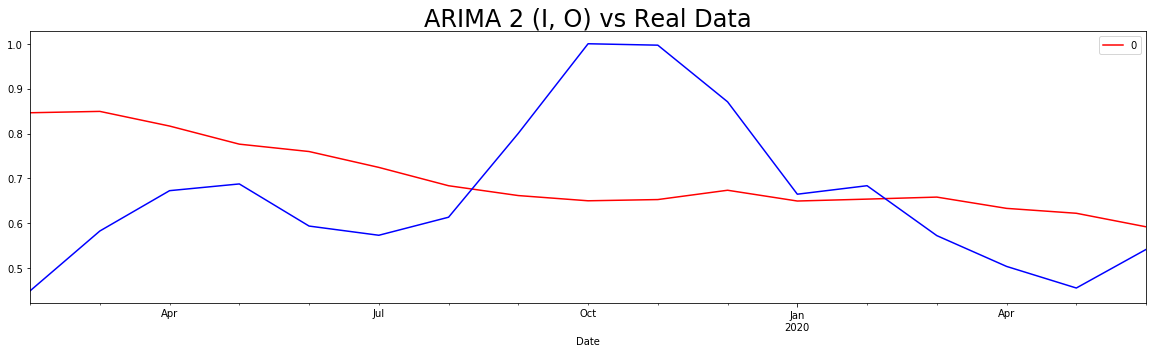

In [609]:
df_auto_pred_w2_io.plot(figsize = (20,5), color = "red")
df_test.StainlessSteelPrice[start_date:end_date].plot(color = "blue")
plt.title("ARIMA 2 (I, O) vs Real Data", size = 24)
plt.show()

Our model Has not improved!

#### ARIMA 3 Ex 

In [610]:
#let's try with iron, ni and zin


model_auto_arima_w3_zin = auto_arima(df_normalized.StainlessSteelPrice, exogenous = df_normalized[['Zinc_Global_USD', 'IronOre_Global_USD', 'Nickel_Global_USD']],
                       max_order = None, max_p = 7, max_q = 7, max_d = 2, max_P = 4, max_Q = 4, max_D = 2,
                       maxiter = 50, alpha = 0.05, n_jobs = -1, trend = 'ct', information_criterion = 'oob',
                       out_of_sample = int(len(df_normalized)*0.1))


In [611]:
model_auto_arima_w3_zin.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   84
Model:               SARIMAX(0, 1, 2)   Log Likelihood                  89.028
Date:                Sun, 13 Jun 2021   AIC                           -162.055
Time:                        22:30:37   BIC                           -142.704
Sample:                    07-01-2013   HQIC                          -154.281
                         - 06-01-2020                                         
Covariance Type:                  opg                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
intercept              0.0020      0.030      0.068      0.946      -0.057       0.061
drift               5.439e-05      0.001      0.092      0.926      -0.001       0.001
Zinc_Global_USD        0.0645      0.213      0.303      0.762      -0.352       0.481
IronOre_Global_USD    -0.2296      0.174     -1.317      0.188      -0.571       0.112
Nickel_Global_USD     -0.2030      0.147     -1.379      0.168      -0.491       0.086
ma.L1                  0.2945      0.132      2.230      0.026       0.036       0.553
ma.L2                  0.1874      0.115      1.629      0.103      -0.038       0.413
sigma2                 0.0072      0.001      4.805      0.000       0.004       0.010
===================================================================================
Ljung-Box (Q):                       35.33   Jarque-Bera (JB):                 0.72
Prob(Q):                              0.68   Prob(JB):                         0.70
Heteroskedasticity (H):               1.07   Skew:                             0.06
Prob(H) (two-sided):                  0.86   Kurtosis:                         2.56
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [612]:
df_auto_pred_w3_zin = pd.DataFrame(model_auto_arima_w3_zin.predict(n_periods = len(df_test[start_date:end_date]),
                           exogenous = df_test[['Zinc_Global_USD', 'IronOre_Global_USD', 'Nickel_Global_USD']][start_date:end_date]),
                            index = df_test[start_date:end_date].index)

In [613]:
abs_error = np.abs(df_test['StainlessSteelPrice']-df_auto_pred_w3_zin.iloc[:, 0])
actual = df_test['StainlessSteelPrice']
mape = np.round(np.mean(abs_error/actual),3)

In [614]:
dire = directional(df_test['StainlessSteelPrice'], df_auto_pred_w3_zin.iloc[:, 0])

In [615]:
tempResultsDf = pd.DataFrame({'Method':['(ARIMA) three Exogenous (Ir,Zi,Ni) '], 'MAPE': [mape], 'DS': [dire] })
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf

Method   MAPE     DS
0                            Auto Regressive  0.455  25.00
0            Auto Regressive Moving average   0.355  43.75
0             (ARIMA) Without any Exogenous   0.174  50.00
0                     (ARIMA) one Exogenous   0.172  68.75
0                     (ARIMA) two Exogenous   0.348  50.00
0            (ARIMA) two Exogenous (Ir, Zi)   0.169  68.75
0  (ARIMA) two Exogenous (Order, Inventory)   0.257  43.75
0         (ARIMA) one Exogenous (Inventory)   0.223  37.50
0        (ARIMA) three Exogenous (Ir,Zi,Ni)   0.228  43.75

Doesn't imrove as well

#### ARIMA 4 Exog

In [616]:
#let's try with iron, ni and zin and inventory


model_auto_arima_w4 = auto_arima(df_normalized.StainlessSteelPrice, exogenous = df_normalized[['Zinc_Global_USD', 'IronOre_Global_USD', 'Nickel_Global_USD', 'Steel_Inventory_M_USD']],
                       max_order = None, max_p = 7, max_q = 7, max_d = 2, max_P = 4, max_Q = 4, max_D = 2,
                       maxiter = 50, alpha = 0.05, n_jobs = -1, trend = 'ct', information_criterion = 'oob',
                       out_of_sample = int(len(df_normalized)*0.1))


In [617]:
model_auto_arima_w4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   84
Model:               SARIMAX(1, 1, 0)   Log Likelihood                  88.602
Date:                Sun, 13 Jun 2021   AIC                           -161.203
Time:                        22:58:36   BIC                           -141.853
Sample:                    07-01-2013   HQIC                          -153.429
                         - 06-01-2020                                         
Covariance Type:                  opg                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
intercept                -0.0039      0.020     -0.191      0.849      -0.044       0.036
drift                     0.0001      0.000      0.324      0.746      -0.001       0.001
Zinc_Global_USD           0.1649      0.173      0.954      0.340      -0.174       0.504
IronOre_Global_USD       -0.2219      0.180     -1.236      0.217      -0.574       0.130
Nickel_Global_USD         0.1306      0.156      0.837      0.403      -0.175       0.437
Steel_Inventory_M_USD     0.3927      0.281      1.398      0.162      -0.158       0.943
ar.L1                     0.2017      0.119      1.702      0.089      -0.031       0.434
sigma2                    0.0069      0.001      5.480      0.000       0.004       0.009
===================================================================================
Ljung-Box (Q):                       41.88   Jarque-Bera (JB):                 0.25
Prob(Q):                              0.39   Prob(JB):                         0.88
Heteroskedasticity (H):               1.12   Skew:                             0.07
Prob(H) (two-sided):                  0.76   Kurtosis:                         2.78
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [618]:
df_auto_pred_w4 = pd.DataFrame(model_auto_arima_w4.predict(n_periods = len(df_test[start_date:end_date]),
                           exogenous = df_test[['Zinc_Global_USD', 'IronOre_Global_USD', 'Nickel_Global_USD', 'Steel_Inventory_M_USD']][start_date:end_date]),
                            index = df_test[start_date:end_date].index)

In [619]:
abs_error = np.abs(df_test['StainlessSteelPrice']-df_auto_pred_w4.iloc[:, 0])
actual = df_test['StainlessSteelPrice']
mape = np.round(np.mean(abs_error/actual),3)

In [620]:
dire = directional(df_test['StainlessSteelPrice'], df_auto_pred_w4.iloc[:, 0])

In [621]:
tempResultsDf = pd.DataFrame({'Method':['(ARIMA) 4 Exogenous'], 'MAPE': [mape], 'DS': [dire] })
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf

Method   MAPE     DS
0                            Auto Regressive  0.455  25.00
0            Auto Regressive Moving average   0.355  43.75
0             (ARIMA) Without any Exogenous   0.174  50.00
0                     (ARIMA) one Exogenous   0.172  68.75
0                     (ARIMA) two Exogenous   0.348  50.00
0            (ARIMA) two Exogenous (Ir, Zi)   0.169  68.75
0  (ARIMA) two Exogenous (Order, Inventory)   0.257  43.75
0         (ARIMA) one Exogenous (Inventory)   0.223  37.50
0        (ARIMA) three Exogenous (Ir,Zi,Ni)   0.228  43.75
0                        (ARIMA) 4 Exogenous  0.316  68.75

Directional Symmetry has increased but MAPE dicreased.

### SARIMAX Model


In [622]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

In [623]:
pdq = list(itertools.product(p, d, q))
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 1, 0),
 (0, 1, 1),
 (1, 0, 0),
 (1, 0, 1),
 (1, 1, 0),
 (1, 1, 1)]

In [624]:
# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [626]:
best_aic = np.inf
best_pdq = None
best_seasonal_pdq = None
temp_model = None
for param in pdq:   
    for param_seasonal in seasonal_pdq: 
        temp_model = SARIMAX(df_train.StainlessSteelPrice,order=param,seasonal_order = param_seasonal,enforce_invertibility=False,
                             enforce_stationarity=False)
        results = temp_model.fit(disp=False)
        if results.aic < best_aic:
            best_aic = results.aic
            best_pdq = param
            best_seasonal_pdq = param_seasonal
print("Best SARIMA {} x {} model - AIC:{}".format(best_pdq,best_seasonal_pdq,best_aic))

Best SARIMA (1, 1, 0) x (0, 0, 0, 12) model - AIC:-140.38899511102312


In [627]:
# using the best parameter in the model
model_sarima = SARIMAX(df_train.StainlessSteelPrice,order=(1,0,2), exog= df_train[['IronOre_Global_USD', 'Zinc_Global_USD']], seasonal_order=(0,0,0,12),enforce_invertibility=False,
                             enforce_stationarity=False)
model_fit = model_sarima.fit()

In [629]:
pred_sarima = model_fit.predict(start=len(df_train), end=len(df_train)+len(df_test)-1, exog = df_test[['IronOre_Global_USD', 'Zinc_Global_USD']], dynamic=False)

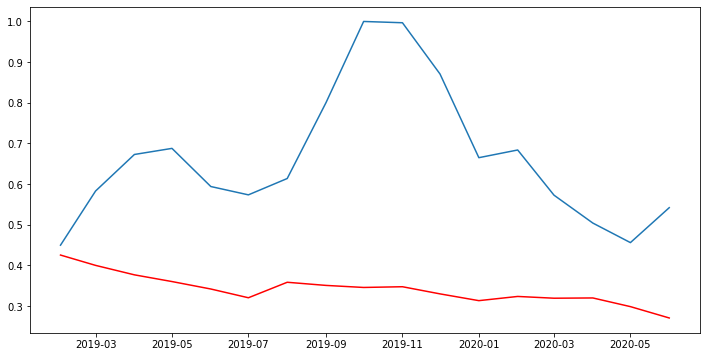

In [630]:
plt.figure(figsize=(12,6))
plt.plot(df_test.StainlessSteelPrice)
plt.plot(pred_sarima, color='red')
plt.show()

In [631]:
abs_error = np.abs(df_test['StainlessSteelPrice']-pred_sarima)
actual = df_test['StainlessSteelPrice']
mape = np.round(np.mean(abs_error/actual),3)

In [632]:
dire = directional(df_test['StainlessSteelPrice'], pred_sarima)

In [633]:
tempResultsDf = pd.DataFrame({'Method':['SARIMAX'], 'MAPE': [mape], 'DS': [dire] })
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf

Method   MAPE     DS
0                            Auto Regressive  0.455  25.00
0            Auto Regressive Moving average   0.355  43.75
0             (ARIMA) Without any Exogenous   0.174  50.00
0                     (ARIMA) one Exogenous   0.172  68.75
0                     (ARIMA) two Exogenous   0.348  50.00
0            (ARIMA) two Exogenous (Ir, Zi)   0.169  68.75
0  (ARIMA) two Exogenous (Order, Inventory)   0.257  43.75
0         (ARIMA) one Exogenous (Inventory)   0.223  37.50
0        (ARIMA) three Exogenous (Ir,Zi,Ni)   0.228  43.75
0                        (ARIMA) 4 Exogenous  0.316  68.75
0                                    SARIMAX  0.457  50.00

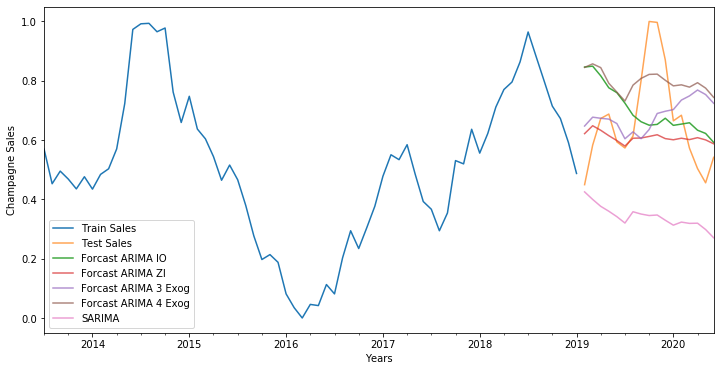

In [639]:
#Let's see all some of the results

axis = df_train['StainlessSteelPrice'].plot(label='Train Sales', figsize=(12, 6))
df_test['StainlessSteelPrice'].plot(ax=axis, label='Test Sales', alpha=0.7)
df_auto_pred_w2_io.iloc[:,0].plot(ax=axis, label = "Forcast ARIMA IO", alpha = 0.9)
df_auto_pred_w2_z.iloc[:,0].plot(ax=axis, label = "Forcast ARIMA ZI", alpha = 0.7)
df_auto_pred_w3_zin.iloc[:,0].plot(ax=axis, label = "Forcast ARIMA 3 Exog", alpha = 0.7)
df_auto_pred_w4.iloc[:,0].plot(ax=axis, label = "Forcast ARIMA 4 Exog", alpha = 0.7)
pred_sarima.plot(ax=axis, label='SARIMA', alpha=0.7)
axis.set_xlabel('Years')
axis.set_ylabel('Champagne Sales')
plt.legend(loc='best')
plt.show()
plt.close()

Seems that data is not stationary and prediction is bad. We can apply some tests on the dataset to obtain more insights. 

# Stationary test

In [175]:
df_normalized.head()

StainlessSteelPrice  Steel_Inventory_M_USD  Steel_Orders_M_USD  \
Date                                                                         
2013-07-01             0.569401               0.573642            0.698922   
2013-08-01             0.452681               0.578660            0.759521   
2013-09-01             0.495268               0.601092            0.748263   
2013-10-01             0.468454               0.597255            0.872096   
2013-11-01             0.435331               0.614817            0.936287   

            IronOre_Global_USD  CoalAustralia_Global_USD  Energy_Index  \
Date                                                                     
2013-07-01            0.897437                  0.401823      0.944773   
2013-08-01            1.000000                  0.401810      0.973028   
2013-09-01            0.970165                  0.416805      0.984422   
2013-10-01            0.953393                  0.446777      0.957629   
2013-11-01            0.992397                  0.487522      0.936175   

            Nickel_Global_USD  Zinc_Global_USD  Copper_Global_USD   
Date                                                                
2013-07-01           0.491041         0.157640            0.863520  
2013-08-01           0.541294         0.186844            0.962684  
2013-09-01           0.495641         0.162242            0.953115  
2013-10-01           0.524126         0.181102            0.968631  
2013-11-01           0.485069         0.171949            0.921686

Stationary detection by creating subplots with 4 and 6 months moving average.

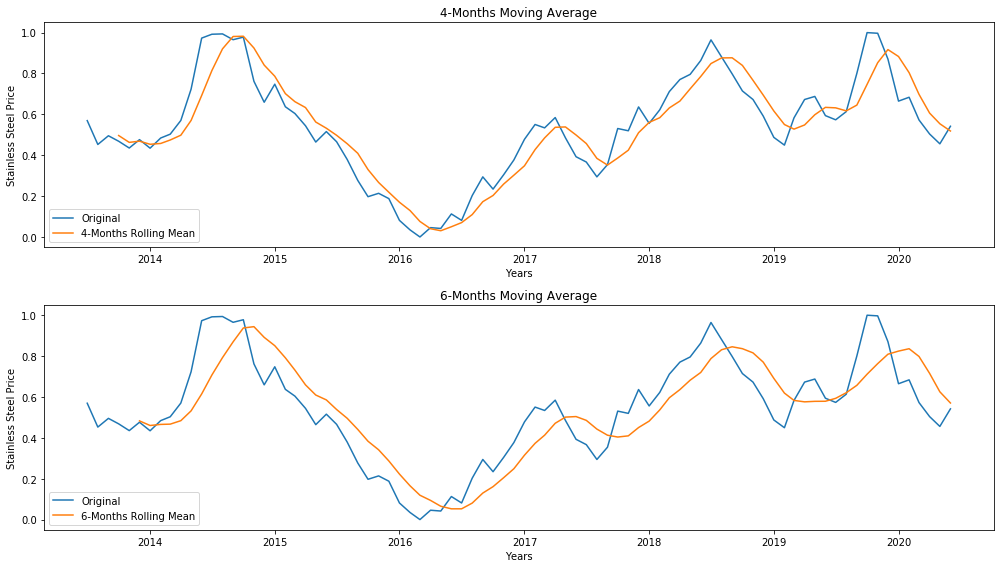

In [640]:
#Creating the subplot placeholders
fig, (ax1, ax2) = plt.subplots(2)
fig.set_figwidth(14)
fig.set_figheight(8)

#4 month MA
ax1.plot(df_normalized.index, df_normalized.StainlessSteelPrice, label='Original')
ax1.plot(df_normalized.index, df_normalized.StainlessSteelPrice.rolling(window=4).mean(), label='4-Months Rolling Mean')
ax1.set_xlabel("Years")
ax1.set_ylabel("Stainless Steel Price")
ax1.set_title("4-Months Moving Average")
ax1.legend(loc='best')

#6 month MA
ax2.plot(df_normalized.index, df_normalized.StainlessSteelPrice, label='Original')
ax2.plot(df_normalized.index, df_normalized.StainlessSteelPrice.rolling(window=6).mean(), label='6-Months Rolling Mean')
ax2.set_xlabel("Years")
ax2.set_ylabel("Stainless Steel Price")
ax2.set_title("6-Months Moving Average")
ax2.legend(loc='best')

plt.tight_layout()
plt.show()


The moving average almost mathces with the original graph. 

# Dickey-Fuller Test

Dicky Fuller Test on the timeseries will help us to verify the Time-Series is stationary or not stationary

Null Hypothesis (H0) : Fail to reject null hypothesis and the time series is non-stationary.

Alternate Hypothesis (HA): The null hypothesis is rejected; it suggests the time series is stationary. By default 0.05 significance rate. 

In [191]:
sts.adfuller(df_normalized.StainlessSteelPrice)

(-2.346563574044855,
 0.15738956399879,
 1,
 82,
 {'1%': -3.512738056978279,
  '5%': -2.8974898650628984,
  '10%': -2.585948732897085},
 -150.87555705963445)


Inference:¶
  1) We can interpret this result using the Test-Statistic from the test.
  2) In our case, the test statistic > critical value, which implies that the series is not stationary.
  4) P-value is also > 0.05 so the data is not stationary.

# Finding the difference between prices

In [641]:
df_return = data_steel.copy()

In [642]:
df_return.set_index('Date', inplace= True)

In [643]:
df_return.index.freq = "MS"

In [644]:
df_return.head()

StainlessSteelPrice  Steel_Inventory_M_USD  Steel_Orders_M_USD  \
Date                                                                         
2013-07-01             0.827352                  20575               10568   
2013-08-01             0.760221                  20609               10821   
2013-09-01             0.784715                  20761               10774   
2013-10-01             0.769293                  20735               11291   
2013-11-01             0.750242                  20854               11559   

            IronOre_Global_USD  CoalAustralia_Global_USD  Energy_Index  \
Date                                                                     
2013-07-01          127.191304                 82.222360    227.022942   
2013-08-01          137.055000                 82.221429    232.234194   
2013-09-01          134.185714                 83.295918    234.335594   
2013-10-01          132.572727                 85.443634    229.393932   
2013-11-01          136.323810                 88.363265    225.437049   

            Nickel_Global_USD  Zinc_Global_USD  Freight_Transport_Index  \
Date                                                                      
2013-07-01        13750.31522      1837.619565                     -0.4   
2013-08-01        14308.26190      1896.392857                      0.5   
2013-09-01        13801.39286      1846.880952                      0.1   
2013-10-01        14117.65217      1884.836957                     -0.1   
2013-11-01        13684.01190      1866.416667                      2.1   

            WTI_Crude_Global_USD  Baltic_Dry_Index  BCI_China  BCI_Europe  \
Date                                                                        
2013-07-01            104.545217              1062   98.80018    99.64265   
2013-08-01            106.546364              1132   99.04874    99.91766   
2013-09-01            106.313809              2003   99.27196   100.18490   
2013-10-01            100.500435              1504   99.40488   100.36330   
2013-11-01             93.812381              1821   99.36221   100.49830   

              BCI_US  CLI_China  CLI_Europe    CLI_US  PMI_US_Manufacturing  \
Date                                                                          
2013-07-01  100.1044   101.1423    99.43615  100.6230                  50.9   
2013-08-01  100.3962   101.1938    99.64082  100.6545                  55.4   
2013-09-01  100.5363   101.2066    99.84383  100.6646                  55.7   
2013-10-01  100.5771   101.1835   100.02300  100.6666                  56.2   
2013-11-01  100.5459   101.1283   100.17150  100.6744                  56.4   

            Copper_Global_USD   
Date                            
2013-07-01             6906.64  
2013-08-01             7186.25  
2013-09-01             7159.27  
2013-10-01             7203.02  
2013-11-01             7070.65

In [645]:
df_return['ret_steel'] = df_return.StainlessSteelPrice.pct_change(1).mul(100)
df_return['ret_iron'] = df_return.IronOre_Global_USD.pct_change(1).mul(100)
df_return['ret_nickel'] = df_return.Nickel_Global_USD.pct_change(1).mul(100)
df_return['ret_zinc'] = df_return.Zinc_Global_USD.pct_change(1).mul(100)

In [646]:
df_return.head()

StainlessSteelPrice  Steel_Inventory_M_USD  Steel_Orders_M_USD  \
Date                                                                         
2013-07-01             0.827352                  20575               10568   
2013-08-01             0.760221                  20609               10821   
2013-09-01             0.784715                  20761               10774   
2013-10-01             0.769293                  20735               11291   
2013-11-01             0.750242                  20854               11559   

            IronOre_Global_USD  CoalAustralia_Global_USD  Energy_Index  \
Date                                                                     
2013-07-01          127.191304                 82.222360    227.022942   
2013-08-01          137.055000                 82.221429    232.234194   
2013-09-01          134.185714                 83.295918    234.335594   
2013-10-01          132.572727                 85.443634    229.393932   
2013-11-01          136.323810                 88.363265    225.437049   

            Nickel_Global_USD  Zinc_Global_USD  Freight_Transport_Index  \
Date                                                                      
2013-07-01        13750.31522      1837.619565                     -0.4   
2013-08-01        14308.26190      1896.392857                      0.5   
2013-09-01        13801.39286      1846.880952                      0.1   
2013-10-01        14117.65217      1884.836957                     -0.1   
2013-11-01        13684.01190      1866.416667                      2.1   

            WTI_Crude_Global_USD  ...    BCI_US  CLI_China  CLI_Europe  \
Date                              ...                                    
2013-07-01            104.545217  ...  100.1044   101.1423    99.43615   
2013-08-01            106.546364  ...  100.3962   101.1938    99.64082   
2013-09-01            106.313809  ...  100.5363   101.2066    99.84383   
2013-10-01            100.500435  ...  100.5771   101.1835   100.02300   
2013-11-01             93.812381  ...  100.5459   101.1283   100.17150   

              CLI_US  PMI_US_Manufacturing  Copper_Global_USD   ret_steel  \
Date                                                                        
2013-07-01  100.6230                  50.9             6906.64        NaN   
2013-08-01  100.6545                  55.4             7186.25  -8.114035   
2013-09-01  100.6646                  55.7             7159.27   3.221957   
2013-10-01  100.6666                  56.2             7203.02  -1.965318   
2013-11-01  100.6744                  56.4             7070.65  -2.476415   

            ret_iron  ret_nickel  ret_zinc  
Date                                        
2013-07-01       NaN         NaN       NaN  
2013-08-01  7.755008    4.057701  3.198338  
2013-09-01 -2.093529   -3.542492 -2.610846  
2013-10-01 -1.202056    2.291503  2.055141  
2013-11-01  2.829452   -3.071617 -0.977288  

[5 rows x 23 columns]

In [647]:
df_return['norm_ret_steel'] = df_return.ret_steel.div(df_return.ret_steel[1])*100
df_return['norm_ret_iron'] = df_return.ret_iron.div(df_return.ret_iron[1])*100
df_return['norm_ret_nickel'] = df_return.ret_nickel.div(df_return.ret_nickel[1])*100
df_return['norm_ret_zinc'] = df_return.ret_zinc.div(df_return.ret_zinc[1])*100

In [648]:
df_return = df_return.iloc[1:]

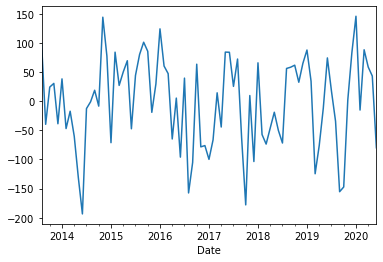

In [649]:
df_return.norm_ret_steel.plot()

In [650]:
sts.adfuller(df_return.norm_ret_steel)

(-6.596338156682241,
 6.910403855593605e-09,
 0,
 82,
 {'1%': -3.512738056978279,
  '5%': -2.8974898650628984,
  '10%': -2.585948732897085},
 805.3859641921563)

This result suggests that,
1) Here p < 0.05 so the return seems stationary data
2) Here test statistics < critical value which also suggests that it is stationary

ACF And PACF plots

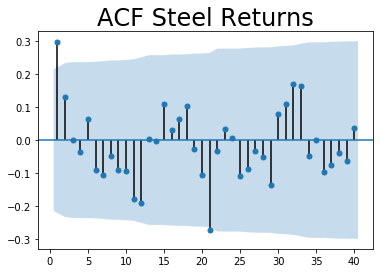

In [651]:
sgt.plot_acf(df_return.norm_ret_steel, lags=40, zero = False)
plt.title("ACF Steel Returns", size=24)
plt.show()

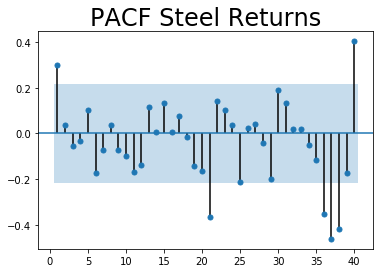

In [652]:
sgt.plot_pacf(df_return.norm_ret_steel, lags = 40, zero = False, method = ('ols'))
plt.title("PACF Steel Returns", size=24)
plt.show()

In [653]:
size = int(len(df_return)*0.9)
df_train_ret, df_test_ret = df_return.iloc[:size], df_return.iloc[size:]

# AR Model for Returns

In [677]:
start_date = '2019-02-01'
end_date = '2020-06-01'

In [655]:
model_ar_ret = AR(df_train_ret.norm_ret_steel)
model_fit = model_ar_ret.fit()

In [656]:
#Lags and Beta value
print('Lag: %s' % model_fit.k_ar)
print('Coefficients: %s' % model_fit.params)

Lag: 11
Coefficients: const                -0.771657
L1.norm_ret_steel     0.203962
L2.norm_ret_steel     0.066807
L3.norm_ret_steel     0.001717
L4.norm_ret_steel    -0.055549
L5.norm_ret_steel     0.143139
L6.norm_ret_steel    -0.105941
L7.norm_ret_steel    -0.141512
L8.norm_ret_steel     0.096966
L9.norm_ret_steel     0.016550
L10.norm_ret_steel    0.014746
L11.norm_ret_steel   -0.236147
dtype: float64


In [657]:
pred_ar_ret = model_fit.predict(start = start_date_model, end = end_date, dynamic= False)

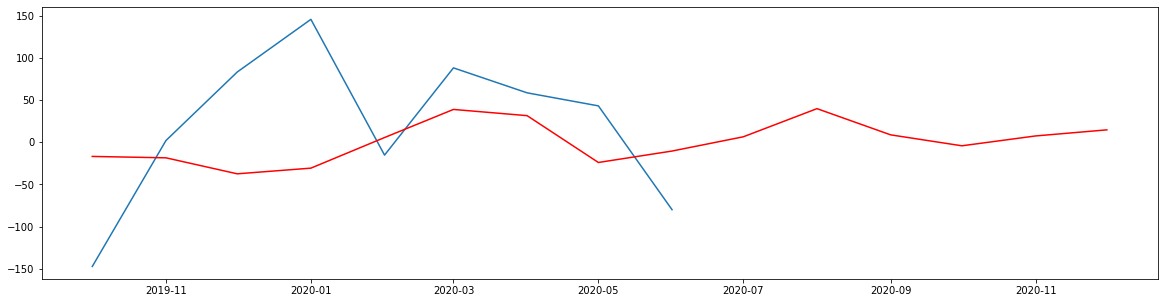

In [658]:
# plotting results
plt.figure(figsize=(20,5))
plt.plot(df_test_ret.norm_ret_steel)
plt.plot(pred_ar_ret[start_date_model:end_date], color='red')
plt.show()

In [265]:
# Mean Absolute Percentage Error
abs_error = np.abs(df_test['StainlessSteelPrice']-pred_ar)
actual = df_test['StainlessSteelPrice']
mape = np.round(np.mean(abs_error/actual),3)
results_return = pd.DataFrame({'Method':['Auto Regressive']})
results_return
mape

0.455

In [ ]:
dire = directional(df_test['StainlessSteelPrice'], pred_ar)

In [659]:
results_return = pd.DataFrame({'Method':['Auto Regressive'], 'MAPE': [mape], 'DS':[dire] })
results_return = results_return[['Method', 'MAPE', 'DS']]
results_return

Method   MAPE    DS
0  Auto Regressive  0.457  50.0

# ARIMA on Returns

#### Auto ARIMA Simple

In [660]:
model_auto_arima_ret_nor = auto_arima(df_return.norm_ret_steel,
                       max_order = None, max_p = 7, max_q = 7, max_d = 2, max_P = 4, max_Q = 4, max_D = 2,
                       maxiter = 50, alpha = 0.05, n_jobs = -1, trend = 'ct', information_criterion = 'oob',
                       out_of_sample = int(len(df_normalized)*0.1))

In [661]:
model_auto_arima_ret_nor.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   83
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -474.602
Date:                Sun, 13 Jun 2021   AIC                            957.205
Time:                        23:17:43   BIC                            966.880
Sample:                             0   HQIC                           961.092
                                 - 83                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      2.1748     16.167      0.135      0.893     -29.512      33.861
drift         -0.0874      0.335     -0.261      0.794      -0.743       0.569
ar.L1          0.3032      0.113      2.680      0.007       0.081       0.525
sigma2      5416.8792   1111.618      4.873      0.000    3238.148    7595.610
===================================================================================
Ljung-Box (Q):                       39.28   Jarque-Bera (JB):                 3.24
Prob(Q):                              0.50   Prob(JB):                         0.20
Heteroskedasticity (H):               0.96   Skew:                            -0.30
Prob(H) (two-sided):                  0.91   Kurtosis:                         2.24
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [678]:
df_auto_pred_ret_nor = pd.DataFrame(model_auto_arima_ret_nor.predict(n_periods = len(df_test_ret[start_date:end_date])),
                            index = df_test_ret[start_date:end_date].index)

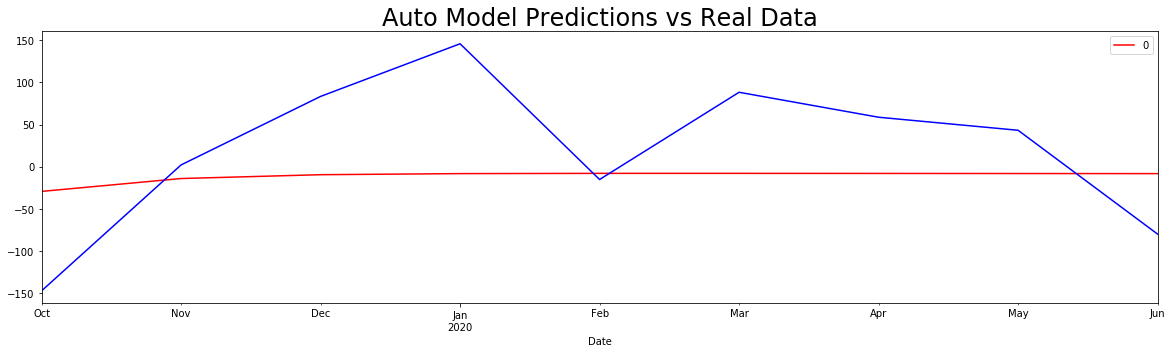

In [679]:
df_auto_pred_ret_nor.plot(figsize = (20,5), color = "red", label ='predict')
df_test_ret.norm_ret_steel.plot(color = "blue")
plt.title("Auto Model Predictions vs Real Data", size = 24)
plt.show()

In [680]:
# Mean Absolute Percentage Error
abs_error = np.abs(df_test_ret['norm_ret_steel']-df_auto_pred_ret_nor.iloc[:, 0])
actual = df_test_ret['norm_ret_steel']
mape = np.round(np.mean(abs_error/actual),3)

In [681]:
dire = directional(df_test_ret['StainlessSteelPrice'], df_auto_pred_ret_nor)

In [682]:
tempResultsDf = pd.DataFrame({'Method':['ARIMA'], 'MAPE': [mape], 'DS': [dire] })
results_return = pd.concat([results_return, tempResultsDf])
results_return

Method   MAPE    DS
0  Auto Regressive  0.457  50.0
0            ARIMA  1.241  37.5

The result has gone worse! 

#### ARIMA with two exog 

In [683]:

model_auto_arima_ret2 = auto_arima(df_return.norm_ret_steel, exogenous = df_return[['norm_ret_iron', 'norm_ret_zinc']],
                       max_order = None, max_p = 7, max_q = 7, max_d = 2, max_P = 4, max_Q = 4, max_D = 2,
                       maxiter = 50, alpha = 0.05, n_jobs = -1, trend = 'ct', information_criterion = 'oob',
                       out_of_sample = int(len(df_normalized)*0.1))

In [684]:
model_auto_arima_ret2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   83
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -473.629
Date:                Sun, 13 Jun 2021   AIC                            959.259
Time:                        23:29:13   BIC                            973.772
Sample:                    08-01-2013   HQIC                           965.089
                         - 06-01-2020                                         
Covariance Type:                  opg                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
intercept         5.9934     16.563      0.362      0.717     -26.469      38.455
drift            -0.1826      0.345     -0.529      0.597      -0.860       0.494
norm_ret_iron     0.1044      0.086      1.218      0.223      -0.064       0.272
norm_ret_zinc    -0.0393      0.061     -0.645      0.519      -0.159       0.080
ar.L1             0.2790      0.123      2.262      0.024       0.037       0.521
sigma2         5291.7212   1092.342      4.844      0.000    3150.771    7432.672
===================================================================================
Ljung-Box (Q):                       42.53   Jarque-Bera (JB):                 2.77
Prob(Q):                              0.36   Prob(JB):                         0.25
Heteroskedasticity (H):               0.91   Skew:                            -0.26
Prob(H) (two-sided):                  0.80   Kurtosis:                         2.27
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [685]:
df_auto_pred_ret2 = pd.DataFrame(model_auto_arima_ret2.predict(n_periods = len(df_test_ret[start_date_model:end_date]),
                           exogenous = df_test_ret[['norm_ret_iron', 'norm_ret_zinc']][start_date_model:end_date]),
                            index = df_test_ret[start_date_model:end_date].index)

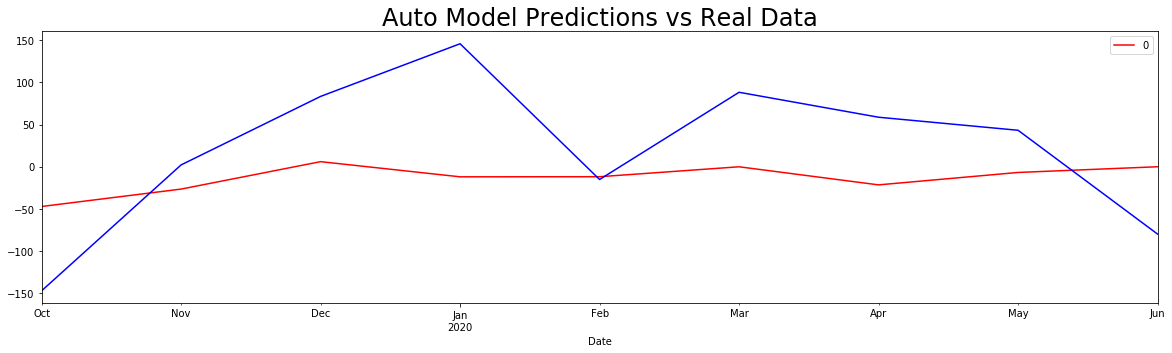

In [686]:
df_auto_pred_ret2.plot(figsize = (20,5), color = "red", label ='predict')
df_test_ret.norm_ret_steel.plot(color = "blue")
plt.title("Auto Model Predictions vs Real Data", size = 24)
plt.show()

In [687]:
# Mean Absolute Percentage Error
abs_error = np.abs(df_test_ret['norm_ret_steel']-df_auto_pred_ret2.iloc[:, 0])
actual = df_test_ret['norm_ret_steel']
mape = np.round(np.mean(abs_error/actual),3)

In [688]:
dire = directional(df_test_ret['StainlessSteelPrice'], df_auto_pred_ret2)

In [689]:
tempResultsDf = pd.DataFrame({'Method':['ARIMA'], 'MAPE': [mape], 'DS': [dire] })
results_return = pd.concat([results_return, tempResultsDf])
results_return

Method   MAPE    DS
0  Auto Regressive  0.457  50.0
0            ARIMA  1.241  37.5
0            ARIMA  1.936  50.0

Result gotten worse!

### SARIMA On Returns 

In [690]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

In [691]:
# Generate all different combinations of p, d and q triplets
pdq = list(itertools.product(p, d, q))
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 1, 0),
 (0, 1, 1),
 (1, 0, 0),
 (1, 0, 1),
 (1, 1, 0),
 (1, 1, 1)]

In [692]:
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [693]:
best_aic = np.inf
best_pdq = None
best_seasonal_pdq = None
temp_model = None
for param in pdq:   
    for param_seasonal in seasonal_pdq: 
        temp_model = SARIMAX(df_train_ret.norm_ret_steel,order=param,seasonal_order = param_seasonal,enforce_invertibility=False,
                             enforce_stationarity=False)
        results = temp_model.fit(disp=False)
        if results.aic < best_aic:
            best_aic = results.aic
            best_pdq = param
            best_seasonal_pdq = param_seasonal
print("Best ARIMA {} x {} model - AIC:{}".format(best_pdq,best_seasonal_pdq,best_aic))

Best ARIMA (0, 1, 1) x (1, 1, 1, 12) model - AIC:568.3020051821746


In [694]:

# using the best parameter in the model
model_sarima_ret = SARIMAX(df_train_ret.norm_ret_steel,order=(0,1,1),seasonal_order=(1,1,1,12),enforce_invertibility=False,
                             enforce_stationarity=False)
result_sa_ret = model_sarima_ret.fit()

In [695]:
pred_sa_ret = model_fit.predict(start=len(df_train_ret), end=len(df_train_ret)+len(df_test_ret)-1, dynamic=False)

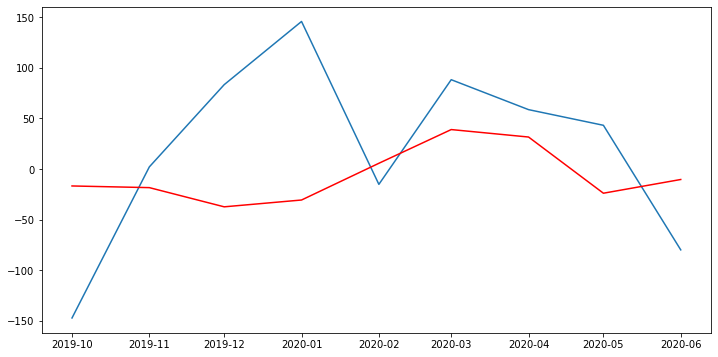

In [696]:
# plot results
plt.figure(figsize=(12,6))
plt.plot(df_test_ret.norm_ret_steel)
plt.plot(pred_sa_ret, color='red')
plt.show()


In [697]:
# Mean Absolute Percentage Error
abs_error = np.abs(df_test_ret['norm_ret_steel']-pred_sa_ret)
actual = df_test_ret['norm_ret_steel']
mape = np.round(np.mean(abs_error/actual),3)


In [698]:
dire = directional(df_test_ret['StainlessSteelPrice'], pred_sa_ret)

In [699]:
tempResultsDf = pd.DataFrame({'Method':['SARIMA'], 'MAPE': [mape], 'DS': [dire] })
results_return = pd.concat([results_return, tempResultsDf])
results_return

Method   MAPE    DS
0  Auto Regressive  0.457  50.0
0            ARIMA  1.241  37.5
0            ARIMA  1.936  50.0
0           SARIMA  1.330  75.0

Seems only AR provided lowest error rate and relying on returns was also not a good idea. 

# Difference of Prices

In [311]:
df_normalized.set_index('Date', inplace= True)

In [312]:
df_normalized.index.freq = 'MS'

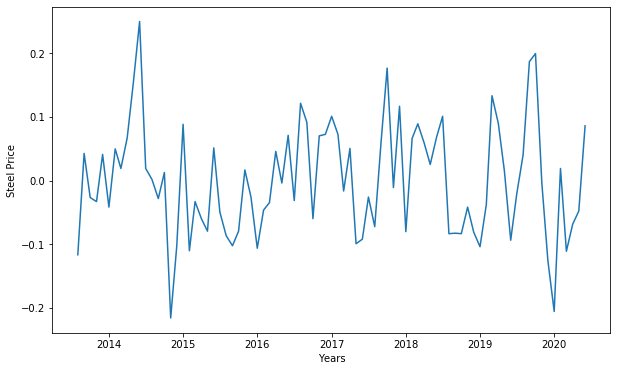

In [700]:
#let's apply difference on the price of steel column


#Differencing once to remove trend
plt.figure(figsize=(10, 6))
plt.plot(df_normalized.StainlessSteelPrice.diff(periods=1))
plt.xlabel('Years')
plt.ylabel('Steel Price')
plt.show()

Seems like the data has some stationary value. Let's try some more test on the dataset 

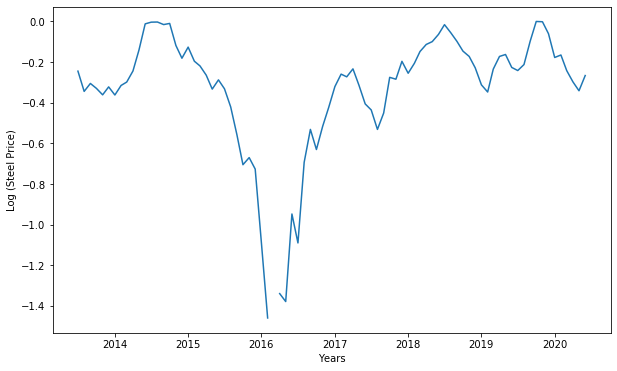

In [701]:
#Log of time series
plt.figure(figsize=(10, 6))
plt.plot(np.log10(df_normalized.StainlessSteelPrice))
plt.xlabel('Years')
plt.ylabel('Log (Steel Price)')
plt.show()

From the plot it is visible that the data has become non-stationary again.

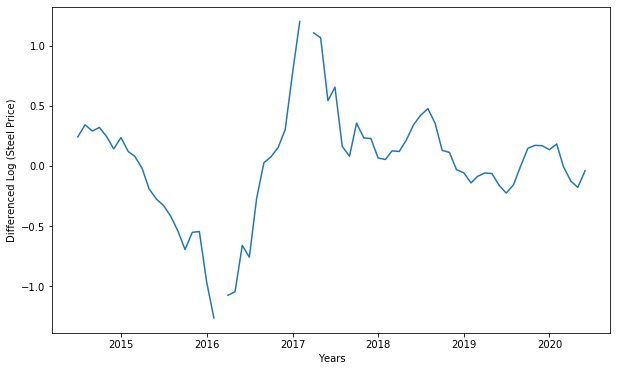

In [702]:
#Difference of log
plt.figure(figsize=(10, 6))
plt.plot(np.log10(df_normalized.StainlessSteelPrice).diff(periods=12))
plt.xlabel('Years')
plt.ylabel('Differenced Log (Steel Price)')
plt.show()

This also suggests that result is not that much good. 

So, we can stick with one time shift of the data (one step difference of the price)

In [318]:
df_difference = df_normalized.copy()

df_difference['prev'] = df_difference['StainlessSteelPrice'].shift(1)

#drop the null values and calculate the difference
df_difference = df_difference.dropna()

df_difference['differ'] = (df_difference['StainlessSteelPrice'] - df_difference['prev'])
df_difference.head(10)

StainlessSteelPrice  Steel_Inventory_M_USD  Steel_Orders_M_USD  \
Date                                                                         
2013-08-01             0.452681               0.578660            0.759521   
2013-09-01             0.495268               0.601092            0.748263   
2013-10-01             0.468454               0.597255            0.872096   
2013-11-01             0.435331               0.614817            0.936287   
2013-12-01             0.476341               0.659681            0.618443   
2014-01-01             0.434543               0.703808            0.848862   
2014-02-01             0.484227               0.704693            0.865389   
2014-03-01             0.503155               0.726978            0.913054   
2014-04-01             0.570189               0.720632            0.861317   
2014-05-01             0.723186               0.748229            0.842874   

            IronOre_Global_USD  CoalAustralia_Global_USD  Energy_Index  \
Date                                                                     
2013-08-01            1.000000                  0.401810      0.973028   
2013-09-01            0.970165                  0.416805      0.984422   
2013-10-01            0.953393                  0.446777      0.957629   
2013-11-01            0.992397                  0.487522      0.936175   
2013-12-01            0.986851                  0.502611      0.979793   
2014-01-01            0.907084                  0.482083      0.960900   
2014-02-01            0.836907                  0.413062      1.000000   
2014-03-01            0.737745                  0.367363      0.959442   
2014-04-01            0.766315                  0.350165      0.965409   
2014-05-01            0.620525                  0.354546      0.968055   

            Nickel_Global_USD  Zinc_Global_USD  Freight_Transport_Index  \
Date                                                                      
2013-08-01           0.541294         0.186844                      0.5   
2013-09-01           0.495641         0.162242                      0.1   
2013-10-01           0.524126         0.181102                     -0.1   
2013-11-01           0.485069         0.171949                      2.1   
2013-12-01           0.506734         0.225890                     -0.9   
2014-01-01           0.522649         0.256676                     -1.4   
2014-02-01           0.531863         0.255480                      1.6   
2014-03-01           0.664674         0.242253                      1.6   
2014-04-01           0.817387         0.251846                      0.4   
2014-05-01           1.000000         0.267629                      0.3   

            WTI_Crude_Global_USD  ...  BCI_China  BCI_Europe    BCI_US  \
Date                              ...                                    
2013-08-01            106.546364  ...   99.04874    99.91766  100.3962   
2013-09-01            106.313809  ...   99.27196   100.18490  100.5363   
2013-10-01            100.500435  ...   99.40488   100.36330  100.5771   
2013-11-01             93.812381  ...   99.36221   100.49830  100.5459   
2013-12-01             97.902273  ...   99.13918   100.53380  100.4033   
2014-01-01             94.996522  ...   98.85413   100.51490  100.2142   
2014-02-01            100.704000  ...   98.65996   100.53130  100.2672   
2014-03-01            100.573333  ...   98.63962   100.61840  100.3807   
2014-04-01            102.178636  ...   98.76656   100.72120  100.4779   
2014-05-01            102.003182  ...   99.00299   100.76170  100.5421   

            CLI_China  CLI_Europe    CLI_US  PMI_US_Manufacturing  \
Date                                                                
2013-08-01   101.1938    99.64082  100.6545                  55.4   
2013-09-01   101.2066    99.84383  100.6646                  55.7   
2013-10-01   101.1835   100.02300  100.6666                  56.2   
2013-11-01   101.1283   100.17150  100.6744        

In [319]:
df_difference.describe()

StainlessSteelPrice  Steel_Inventory_M_USD  Steel_Orders_M_USD  \
count            83.000000              83.000000           83.000000   
mean              0.540126               0.498300            0.520413   
std               0.250896               0.261787            0.298249   
min               0.000000               0.000000            0.000000   
25%               0.413644               0.335596            0.299401   
50%               0.541798               0.516824            0.545629   
75%               0.685726               0.704250            0.817485   
max               1.000000               1.000000            1.000000   

       IronOre_Global_USD  CoalAustralia_Global_USD  Energy_Index  \
count           83.000000                 83.000000     83.000000   
mean             0.400440                  0.396482      0.485965   
std              0.243728                  0.272988      0.252139   
min              0.000000                  0.000000      0.000000   
25%              0.212694                  0.190233      0.316662   
50%              0.345772                  0.350165      0.423056   
75%              0.529414                  0.618261      0.601720   
max              1.000000                  1.000000      1.000000   

       Nickel_Global_USD  Zinc_Global_USD  Freight_Transport_Index  \
count          83.000000        83.000000                83.000000   
mean            0.396419         0.419720                 0.128916   
std             0.243967         0.233421                 1.236195   
min             0.000000         0.000000                -7.100000   
25%             0.199607         0.251221                -0.450000   
50%             0.397840         0.383568                 0.300000   
75%             0.523388         0.566502                 0.750000   
max             1.000000         1.000000                 2.100000   

       WTI_Crude_Global_USD  ...  BCI_China  BCI_Europe      BCI_US  \
count             83.000000  ...  83.000000   83.000000   83.000000   
mean              60.493077  ...  98.709793  100.580593  100.176378   
std               20.987794  ...   0.854087    1.126036    0.882018   
min               16.807273  ...  94.501530   95.996640   98.102130   
25%               47.693636  ...  98.265575  100.445350   99.524555   
50%               54.839091  ...  98.659960  100.565000  100.357500   
75%               67.755776  ...  99.366535  101.056600  100.812350   
max              106.546364  ...  99.923670  102.323700  101.573800   

       CLI_China  CLI_Europe      CLI_US  PMI_US_Manufacturing  \
count   83.00000   83.000000   83.000000             83.000000   
mean    99.54466  100.030680   99.804637             54.063855   
std      2.03211    1.575640    1.373187              4.107832   
min     85.38329   90.343960   92.280250             41.500000   
25%     99.22394   99.779585   99.267445             51.300000   
50%     99.83994  100.295600  100.004100             54.300000   
75%    100.48440  100.503550  100.681400             57.500000   
max    101.20660  101.709300  100.968000             60.800000   

       Copper_Global_USD        prev     differ  
count           83.000000  83.000000  83.000000  
mean          6026.599036   0.540458  -0.000333  
std            782.468475   0.250917   0.089787  
min           4471.790000   0.000000  -0.216088  
25%           5629.955000   0.413644  -0.076104  
50%           6017.900000   0.544164  -0.011041  
75%           6768.330000   0.685726   0.066640  
max           7291.470000   1.000000   0.250000  

[8 rows x 21 columns]

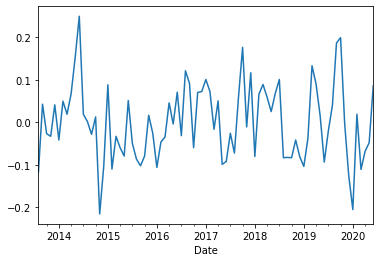

In [320]:
df_difference.differ.plot()

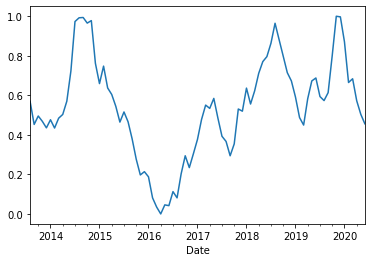

In [321]:
df_difference.prev.plot()

In [322]:
sts.adfuller(df_difference.differ)

(-6.431416862920077,
 1.6937193963921122e-08,
 0,
 82,
 {'1%': -3.512738056978279,
  '5%': -2.8974898650628984,
  '10%': -2.585948732897085},
 -144.02822622061888)

Seems that difference of the prices from today and past day is giving a stationary dataset. 
From this adfuller test we can say that the p value is < 0.05 which says that it is significant and also the test statistics and critical value suggest that this is stationary. 

# AR Model on Diff

In [703]:
size = int(len(df_difference)*0.8)
df_train_diff, df_test_diff = df_difference.iloc[:size], df_difference.iloc[size:]

In [704]:
model_ar = AR(df_train_diff.differ)
model_df_ar = model_ar.fit()

In [705]:
#Lags and Beta value
print('Lag: %s' % model_df_ar.k_ar)
print('Coefficients: %s' % model_df_ar.params)

Lag: 11
Coefficients: const        -0.007608
L1.differ     0.154543
L2.differ     0.079839
L3.differ     0.151719
L4.differ    -0.055334
L5.differ     0.025008
L6.differ    -0.191514
L7.differ    -0.037382
L8.differ     0.114782
L9.differ    -0.002686
L10.differ    0.009517
L11.differ   -0.205315
dtype: float64


In [706]:
pred_ar_df = model_df_ar.predict(start=len(df_train_diff), end=len(df_train_diff)+len(df_test_diff)-1, dynamic=False)

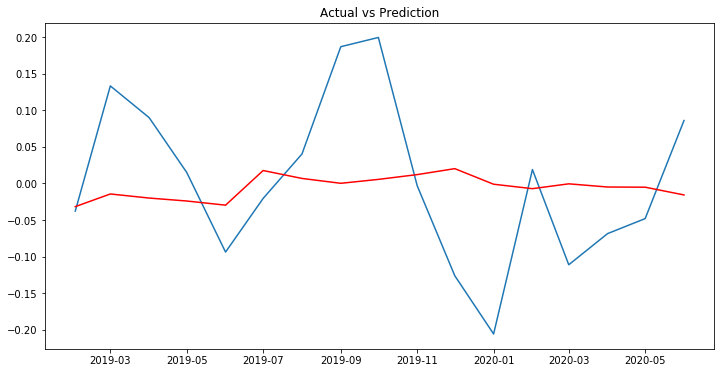

In [707]:
# plotting results
plt.figure(figsize=(12,6))
plt.plot(df_test_diff.differ)
plt.plot(pred_ar_df, color='red')
plt.title("Actual vs Prediction")
plt.show()

In [708]:
# Mean Absolute Percentage Error
abs_error = np.abs(df_test_diff['differ']-pred_ar)
actual = df_test_diff['differ']
mape = np.round(np.mean(abs_error/actual),3)
results_differ = pd.DataFrame({'Method':['Auto Regressive']})
results_differ
mape

-5.233

In [709]:
dire = directional(df_test_ret['StainlessSteelPrice'], pred_ar)

In [710]:
results_differ = pd.DataFrame({'Method':['Auto Regressive on Diff'], 'MAPE': [mape], 'DS': [dire]})
results_differ = results_differ[['Method', 'MAPE', 'DS']]
results_differ

Method   MAPE    DS
0  Auto Regressive on Diff -5.233  75.0

Not a expected result! 

### ARIMA on Differences of Price

In [711]:

model_auto_arima_df = auto_arima(df_difference.differ,
                       max_order = None, max_p = 7, max_q = 7, max_d = 2, max_P = 4, max_Q = 4, max_D = 2,
                       maxiter = 50, alpha = 0.05, n_jobs = -1, trend = 'ct', information_criterion = 'oob',
                       out_of_sample = int(len(df_difference)*0.1))

In [712]:
model_auto_arima_df.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   83
Model:               SARIMAX(1, 0, 0)   Log Likelihood                  87.279
Date:                Sun, 13 Jun 2021   AIC                           -166.558
Time:                        23:37:33   BIC                           -156.883
Sample:                             0   HQIC                          -162.671
                                 - 83                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0041      0.018      0.230      0.818      -0.031       0.039
drift      -6.301e-05      0.000     -0.178      0.859      -0.001       0.001
ar.L1          0.3229      0.108      2.989      0.003       0.111       0.535
sigma2         0.0071      0.001      5.566      0.000       0.005       0.010
===================================================================================
Ljung-Box (Q):                       31.52   Jarque-Bera (JB):                 0.77
Prob(Q):                              0.83   Prob(JB):                         0.68
Heteroskedasticity (H):               0.99   Skew:                             0.09
Prob(H) (two-sided):                  0.99   Kurtosis:                         2.56
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [713]:
df_auto_pred_df = pd.DataFrame(model_auto_arima_df.predict(n_periods = len(df_test_diff[start_date:end_date]),
                            index = df_test_diff[start_date:end_date].index))

In [714]:
df_auto_pred_df['Date'] = pd.date_range(start=start_date, periods=len(df_auto_pred_df), freq='MS')


In [715]:
df_auto_pred_df.set_index('Date', inplace= True)

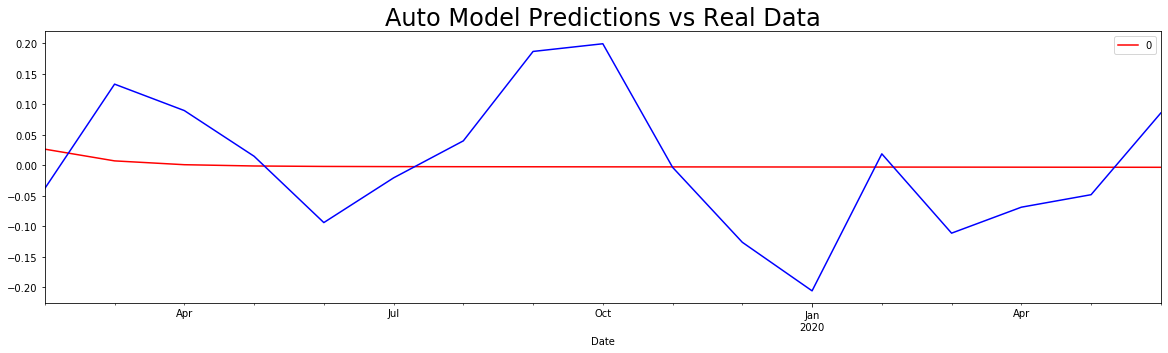

In [716]:
df_auto_pred_df.plot(figsize = (20,5), color = "red")
df_test_diff.differ[start_date:end_date].plot(color = "blue")
plt.title("Auto Model Predictions vs Real Data", size = 24)
plt.show()

In [717]:
abs_error = np.abs(df_test_diff['differ']-df_auto_pred_df.iloc[:, 0])
actual = df_test_diff['differ']
mape = np.round(np.mean(abs_error/actual),3)

In [718]:
dire = directional(df_test_diff['StainlessSteelPrice'], df_auto_pred_df)

In [719]:
tempResultsDf = pd.DataFrame({'Method':['ARIMA on Diff '], 'MAPE': [mape], 'DS': [dire]})
results_differ = pd.concat([results_differ, tempResultsDf])
results_differ

Method   MAPE    DS
0  Auto Regressive on Diff -5.233  75.0
0           ARIMA on Diff  -0.022  75.0

Now let's see after Appling Moving average on Price and difference

### Holt Winter on Prices

First Additive

In [720]:
#we can use the data_steel which includes the  prices of steel

df_mova = data_steel.copy()

In [721]:
df_mova.set_index('Date', inplace= True)


In [722]:
df_mova.index.freq = 'MS'

In [723]:
size = int(len(df_mova)*0.8)
df_train_m, df_test_m = df_mova.iloc[:size+1], df_mova.iloc[size:]

In [724]:
x_train = df_train_m.drop('StainlessSteelPrice', axis=1)
x_test = df_test_m.drop('StainlessSteelPrice', axis=1)
y_train = df_train_m[['StainlessSteelPrice']]
y_test = df_test_m[['StainlessSteelPrice']]

In [725]:
y_train.isna().sum()

StainlessSteelPrice    0
dtype: int64

In [726]:
y_hat_avg = df_test_m.copy()


In [727]:
fit1 = ExponentialSmoothing(np.asarray(df_train_m['StainlessSteelPrice']) ,seasonal_periods=12 ,trend='add', seasonal='add').fit()
fit1.params

{'smoothing_level': 0.7894736842105263,
 'smoothing_slope': 0.045790535075151004,
 'smoothing_seasonal': 0.21052631578947367,
 'damping_slope': nan,
 'initial_level': 0.8141861729665738,
 'initial_slope': 0.007914614326816725,
 'initial_seasons': array([ 0.05682015,  0.00080657, -0.02560118, -0.03218532, -0.06321054,
        -0.06852996, -0.0557884 , -0.03746325, -0.01013181,  0.01556934,
         0.0036215 ,  0.03146861]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [728]:
y_hat_avg['Holt_Winter'] = fit1.forecast(len(df_test_m))


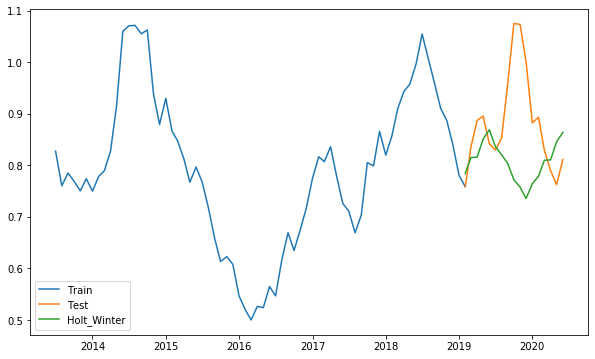

In [729]:
plt.figure(figsize=(10,6))
plt.plot( df_train_m['StainlessSteelPrice'], label='Train')
plt.plot(df_test_m['StainlessSteelPrice'], label='Test')
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')

In [731]:
# Mean Absolute Percentage Error
abs_error = np.abs(y_test['StainlessSteelPrice']-y_hat_avg.Holt_Winter)
actual = y_test['StainlessSteelPrice']
mape = np.round(np.mean(abs_error/actual),4)

In [732]:
dire = directional(y_test['StainlessSteelPrice'], y_hat_avg.Holt_Winter)

In [734]:
tempResultsDf = pd.DataFrame({'Method':['Holt Winter Add'], 'MAPE': [mape], 'DS': [dire] })
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf

Method    MAPE     DS
0                            Auto Regressive  0.4550  25.00
0            Auto Regressive Moving average   0.3550  43.75
0             (ARIMA) Without any Exogenous   0.1740  50.00
0                     (ARIMA) one Exogenous   0.1720  68.75
0                     (ARIMA) two Exogenous   0.3480  50.00
0            (ARIMA) two Exogenous (Ir, Zi)   0.1690  68.75
0  (ARIMA) two Exogenous (Order, Inventory)   0.2570  43.75
0         (ARIMA) one Exogenous (Inventory)   0.2230  37.50
0        (ARIMA) three Exogenous (Ir,Zi,Ni)   0.2280  43.75
0                        (ARIMA) 4 Exogenous  0.3160  68.75
0                                    SARIMAX  0.4570  50.00
0                            Holt Winter Add  0.1033  50.00

Now the multiplicative

In [735]:
y_hat_avg = df_test_m.copy()

In [736]:

fit1 = ExponentialSmoothing(np.asarray(df_train_m['StainlessSteelPrice']) ,seasonal_periods=12 ,trend='add', seasonal='mul').fit()
fit1.params

{'smoothing_level': 0.8421052631578947,
 'smoothing_slope': 0.041716500964917844,
 'smoothing_seasonal': 0.15789473684210525,
 'damping_slope': nan,
 'initial_level': 0.8118093953332921,
 'initial_slope': 0.007210442412601872,
 'initial_seasons': array([1.07690235, 1.01465458, 0.94379798, 0.97103297, 0.91087884,
        0.89323616, 0.95118579, 0.94749943, 1.00478355, 1.04504977,
        1.02636054, 1.07611659]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [737]:
y_hat_avg['Holt_Winter'] = fit1.forecast(len(df_test_m))

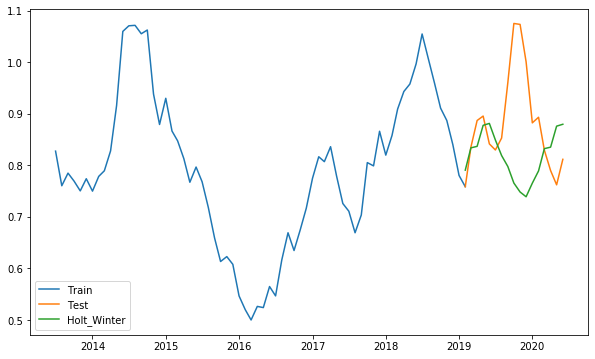

In [738]:
plt.figure(figsize=(10,6))
plt.plot(df_train_m['StainlessSteelPrice'], label='Train')
plt.plot(df_test_m['StainlessSteelPrice'], label='Test')
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')

In [739]:
# Mean Absolute Percentage Error
abs_error = np.abs(y_test['StainlessSteelPrice']-y_hat_avg.Holt_Winter)
actual = y_test['StainlessSteelPrice']
mape = np.round(np.mean(abs_error/actual),4)

In [740]:
dire = directional(y_test['StainlessSteelPrice'], y_hat_avg.Holt_Winter)

In [741]:
tempResultsDf = pd.DataFrame({'Method':['Holt Winter Mult'], 'MAPE': [mape], 'DS': [dire] })
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf

Method    MAPE     DS
0                            Auto Regressive  0.4550  25.00
0            Auto Regressive Moving average   0.3550  43.75
0             (ARIMA) Without any Exogenous   0.1740  50.00
0                     (ARIMA) one Exogenous   0.1720  68.75
0                     (ARIMA) two Exogenous   0.3480  50.00
0            (ARIMA) two Exogenous (Ir, Zi)   0.1690  68.75
0  (ARIMA) two Exogenous (Order, Inventory)   0.2570  43.75
0         (ARIMA) one Exogenous (Inventory)   0.2230  37.50
0        (ARIMA) three Exogenous (Ir,Zi,Ni)   0.2280  43.75
0                        (ARIMA) 4 Exogenous  0.3160  68.75
0                                    SARIMAX  0.4570  50.00
0                            Holt Winter Add  0.1033  50.00
0                           Holt Winter Mult  0.1057  50.00

# Prediction using Best method

Decided to use the Holt methods as they give the lowest MAPE and 50% DS

In [394]:
data_predict = data_steel.copy()

In [395]:
data_predict.set_index('Date', inplace= True)

In [396]:
data_predict.index.freq = "MS"

In [397]:
size = int(len(data_predict)*0.8)
train_pre, test_pre = data_predict.iloc[:size+1], data_predict.iloc[size:]

In [402]:
test_pre.tail()

StainlessSteelPrice  Steel_Inventory_M_USD  Steel_Orders_M_USD  \
Date                                                                         
2020-02-01             0.893123                  19753                9914   
2020-03-01             0.829167                  19945                9072   
2020-04-01             0.789704                  19824                7800   
2020-05-01             0.762035                  19441                8908   
2020-06-01             0.811477                  18998                8979   

            IronOre_Global_USD  CoalAustralia_Global_USD  Energy_Index  \
Date                                                                     
2020-02-01           87.625000                 71.050179    110.312331   
2020-03-01           88.659091                 70.204870     73.684533   
2020-04-01           83.750000                 64.620000     52.771306   
2020-05-01           91.333333                 54.148308     66.915249   
2020-06-01          103.340909                 55.002760     82.415155   

            Nickel_Global_USD  Zinc_Global_USD  Freight_Transport_Index  \
Date                                                                      
2020-02-01        12715.55000      2113.237500                     -0.6   
2020-03-01        11846.22727      1903.625000                     -0.6   
2020-04-01        11804.00950      1903.367000                     -7.1   
2020-05-01        12179.60526      1975.322632                      1.0   
2020-06-01        12727.15227      2025.714545                      1.3   

            WTI_Crude_Global_USD  Baltic_Dry_Index  BCI_China  BCI_Europe  \
Date                                                                        
2020-02-01             50.601500               535   94.50153    99.15099   
2020-03-01             29.877273               626   96.55129    97.81904   
2020-04-01             16.807273               635   98.21212    96.24888   
2020-05-01             28.794762               504   99.01438    95.99664   
2020-06-01             38.302273              1799   99.29423    96.85281   

              BCI_US  CLI_China  CLI_Europe    CLI_US  PMI_US_Manufacturing  \
Date                                                                          
2020-02-01  98.99674   85.38329    99.33393  99.23477                  50.9   
2020-03-01  98.56776   92.34856    96.87456  97.54372                  50.1   
2020-04-01  98.10213   95.14948    90.34396  92.28025                  49.1   
2020-05-01  98.35104   97.71723    93.02601  93.95093                  41.5   
2020-06-01  99.24643   98.10716    96.77950  95.88245                  43.1   

            Copper_Global_USD   
Date                            
2020-02-01             5687.75  
2020-03-01             5182.63  
2020-04-01             5057.97  
2020-05-01             5239.83  
2020-06-01             5754.60

In [413]:
fit_holt = ExponentialSmoothing(np.asarray(train_pre['StainlessSteelPrice']) ,seasonal_periods=12 ,trend='add', seasonal='add').fit()
fit_holt.params

{'smoothing_level': 0.7894736842105263,
 'smoothing_slope': 0.045790535075151004,
 'smoothing_seasonal': 0.21052631578947367,
 'damping_slope': nan,
 'initial_level': 0.8141861729665738,
 'initial_slope': 0.007914614326816725,
 'initial_seasons': array([ 0.05682015,  0.00080657, -0.02560118, -0.03218532, -0.06321054,
        -0.06852996, -0.0557884 , -0.03746325, -0.01013181,  0.01556934,
         0.0036215 ,  0.03146861]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [414]:
Forecasting_1 = fit_holt.forecast(steps = 3)
Forecasting_2 = fit_holt.forecast(steps = 6)

In [415]:
idx = pd.date_range(start='2020-06-01', periods=3, freq='MS')
Forecasting_1 = pd.Series(Forecasting_1,index=idx)

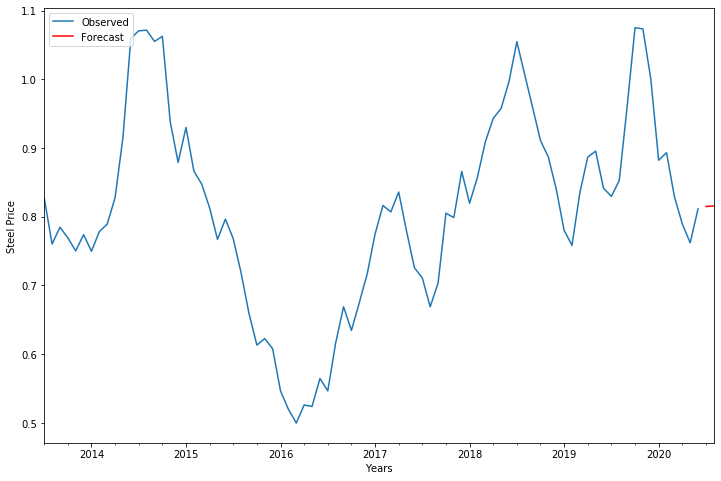

In [416]:
axis = data_predict.StainlessSteelPrice.plot(label='Observed', figsize=(12, 8))
Forecasting_1[1:].plot(ax=axis, label='Forecast',color='r')
axis.set_xlabel('Years')
axis.set_ylabel('Steel Price')
plt.legend(loc='upper left')
plt.show()

In [421]:
idx = pd.date_range(start='2020-06-01', periods=6, freq='MS')
Forecasting_2 = pd.Series(Forecasting_2,index=idx)

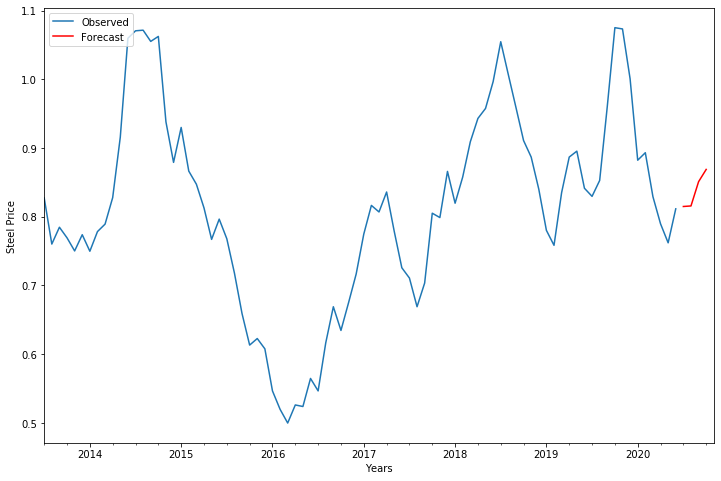

In [422]:
axis = data_predict.StainlessSteelPrice.plot(label='Observed', figsize=(12, 8))
Forecasting_2[1:].plot(ax=axis, label='Forecast',color='r')
axis.set_xlabel('Years')
axis.set_ylabel('Steel Price')
plt.legend(loc='upper left')
plt.show()

These are the forcast! Although it doesn't seem good enough

###### So from the statistical models it is visible that with limited data the model doesn't perform that good. All models performed quite similar in MAPE factor and Directional Symmentry. However, with return's value the results fell mostly. Difference of prices somehow showed average result. 

###### Although the forecast result doesn't show a very good outcome but I think with this amount of data it is hard to get better forecast.